# DataCamp - (Python)

##    Building Recommendation Engines with PySpark               


In [1]:
data_folder = "C:/Users/Admin/Dropbox/Python/ficheiros/DataCamp/DataCamp - Building Recommendation Engines with PySpark/"

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from pyspark.sql import SparkSession
from pyspark.sql import *
from pyspark.sql.types import *
from pyspark.sql.functions import array, col, explode, lit, struct   # to build the 'to_long' function

from pyspark.sql.functions import monotonically_increasing_id
from pyspark.sql.functions import col

from pyspark.ml.recommendation import ALS
from pyspark.ml.evaluation import RegressionEvaluator

from pyspark.sql.functions import min, max, avg

from pyspark.ml.tuning import ParamGridBuilder, CrossValidator



##    CHAPTER 1  - Recommendations Are Everywhere


#### Exercício 1 - Why learn how to build recommendation engines?

In [4]:
#vídeo

Exercício 2

Taylor and Jane both like watching movies. Taylor only likes dramas, comedies, and romances. Jane likes only action, adventure, and otherwise exciting films. One of the greatest benefits of ALS-based recommendation engines is that they can identify movies or items that users will like, even if they themselves think that they might not like them. Take a look at the movie ratings that Taylor and Jane have provided below. It would stand to reason that their different preferences would generate different recommendations.

In [5]:
%%script false

# View TJ_ratings
TJ_ratings.show()

# Generate recommendations for users
get_ALS_recs(["Taylor","Jane"]) 

Couldn't find program: 'false'


    userId  pred_rating                 title          genres
    0   Taylor         3.89   Seven Pounds (2008)           Drama
    1   Taylor         3.61      Cure, The (1995)           Drama
    2   Taylor         3.55  Kiss Me, Guido (1997          Comedy
    3   Taylor         3.29  You've Got Mail (199  Comedy|Romance
    4   Taylor         3.27  10 Things I Hate Abo  Comedy|Romance
    5   Taylor         3.26  Corrina, Corrina (19  Comedy|Drama|R
    6     Jane         4.96           Fear (1996)        Thriller
    7     Jane         4.85  Lord of the Rings: T  Adventure|Fant
    8     Jane         4.70  Lord of the Rings: T  Adventure|Fant
    9     Jane         4.55  No Holds Barred (198          Action
    10    Jane         4.54  Lord of the Rings: T  Action|Adventu
    11    Jane         4.30  Band of Brothers (20  Action|Drama|W
    12    Jane         4.26   Transformers (2007)  Action|Sci-Fi|

Exercício 3

In [6]:
# What is a reason for learning to build recommendation engines?

print("Show users items/products relevant to them that they may not know are available.")

Show users items/products relevant to them that they may not know are available.


#### Exercício 4 - Recommendation Engine Types and Data Types

In [7]:
#vídeo

# Types of Recommendation engines:
# 1) Collaborative filtering
# 2) Content-based filtering

# Two types of ratings:
# 1) explicit ratings (when you imput a number of stars or make a like - users explicitly state how much they liked or
#                      disliked something)
# 2) implicit ratings (based on the passive track of your behavior - like the number of movies the user say in different
#                      genres. Generated from the frequency of your actions)

# The ALS algortihm can be used for collaborative filtering or for content-based filtering, but we'll focus more on 
# collaborative. The ALS algorithm can also be used both for explicit or implicit ratings.


Exercício 5

In [8]:
# Collaborative vs Content-Based Filtering

# Below are statements that are often used when providing recommendations. Select the one that DOES NOT indicate 
# collaborative filtering.


# Answer (does not indicate collaborative filtering):
# "Because you liked that product, we think you'll like this product." 
# - the only one that doesn't indicate that the recommendation was generated through similar users.

Exercício 6

In [9]:
# Collaborative vs Content-Based Filtering Part II

# Look at the df dataframe using the .show() method and/or the .columns method, and determine whether it is best suited 
# for "collaborative filtering", "content-based filtering", or "both".

# df.columns
print("['UserId', 'MovieId', 'Movie_Title', 'Genre', 'Language', 'Year_Produced', 'rating']")

['UserId', 'MovieId', 'Movie_Title', 'Genre', 'Language', 'Year_Produced', 'rating']


In [10]:
# Answer
print("""Because this dataset includes descriptive tags like genre and language, as well as user ratings, it is suited 
for both collaborative and content-based filtering.""")

Because this dataset includes descriptive tags like genre and language, as well as user ratings, it is suited 
for both collaborative and content-based filtering.


Exercício 7

In [11]:
# Implicit vs Explicit Data

# Recall the differences between implicit and explicit ratings. Take a look at the df1 dataframe to understand whether 
# the data includes implicit or explicit ratings data.

# df1.columns
print("['Movie_Title', 'Genre', 'Num_Views']")

['Movie_Title', 'Genre', 'Num_Views']


In [12]:
# Type "implicit" or "explicit"
answer = "implicit"

Exercício 8

In [13]:
%%script false
# Ratings data types

# Markus watches a lot of movies, including documentaries, superhero movies, classics, and dramas. 
# Drawing on your previous experience with Spark, use the markus_ratings dataframe, which contains data on the number 
# of times Markus has seen movies in various genres, and think about whether these are implicit or explicit ratings. 
# Use the groupBy() method to determine which genre has the highest rating, which could likely influence what 
# recommendations ALS would generate for Markus.

# Group the data by "Genre"
markus_ratings.groupBy("Genre").sum().show()

# Markus seems to like animated children's movies. Or perhaps his 3 kids use his movie streaming account more than he does.

Couldn't find program: 'false'


    +------------------+--------------+
    |             Genre|sum(Num_Views)|
    +------------------+--------------+
    |             Drama|             5|
    |       Documentary|             3|
    |            Action|             4|
    |Animated Childrens|            49|
    +------------------+--------------+

#### Exercício 9 - Uses for Recommendation Engines

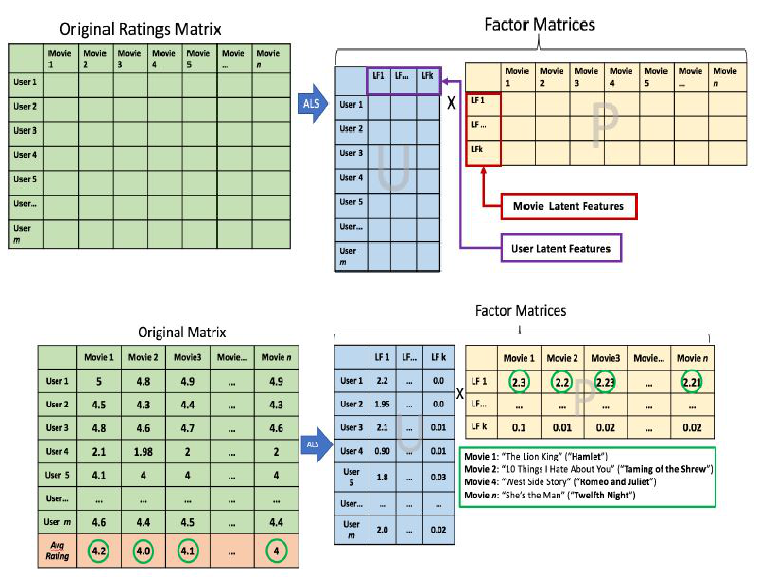

In [14]:
#vídeo

# Alternate uses for ALS
# we've only seen recommendations as a case use for the ALS alorithm, but there are others:
#   - latent feature discovery
#   - item grouping
#   - dimensionality reduction
#   - image compression

# In this course we're only going to talk about some of these.

# First, latent features:
#  - how can we know how users categorize what they see? ALS can help with this
#  - movies are often like this. Documentaries can become drama, comedy can become other, etc

plt.subplot(2, 1, 1)
image = plt.imread(data_folder + "matrix_factorization_0.jpg")
plt.axis('off')
plt.imshow(image)

# ALS will factor this initial matrix with user ratings for the different movies into 2 matrices: one containing user
# information and the other product (movie in this case) information.
# each contains information of the initial matrix but other columns or rows containing unlabeled axes which are called
# latent features.
# ... comparar os ratings de filmes de um género e outros ratings de filmes de outro género - ALS indica como se relaciona
# ver exemplo de filmes de adaptações de peças de Shakespeare. Info que n aparecia em nenhum lado é revelada através de ALS
# ver vídeo

plt.subplot(2, 1, 2)
image = plt.imread(data_folder + "matrix_factorization.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplots_adjust(left=0, bottom=-1, right=1.75, top=1, wspace=0, hspace=0)
plt.show()

Exercício 10

In [15]:
# Alternate uses of recommendation engines.

# Select the best definition of "latent features".
print("Features that are contained in data, but aren't directly observable.")

Features that are contained in data, but aren't directly observable.


Exercício 11

In [16]:
%%script false
# Confirm understanding of latent features

# Matrix P is provided here. Its columns represent movies and its rows represent several latent features.
# Use your understanding of Spark commands to view matrix P and see if you can determine what some of the latent features
# might represent. After examining the matrix, look at the dataframe Pi, which contains a rough approximation of what
# these latent features could represent. See if you weren't far off.

# Examine matrix P using the .show() method
P.show()

Couldn't find program: 'false'


    +--------+------------+--------+---------+------------+------+----------+
    |Iron Man|Finding Nemo|Avengers|Toy Story|Forrest Gump|Wall-E|Green Mile|
    +--------+------------+--------+---------+------------+------+----------+
    |     0.2|         2.4|     0.1|      2.4|           0|   2.5|         0|
    |     1.5|         1.4|     1.4|      1.3|         1.8|   1.8|       2.5|
    |     2.5|         1.1|     2.4|      0.9|         0.2|   0.9|      0.09|
    |     1.9|           2|     1.5|      2.2|         1.2|   0.3|      0.01|
    |       0|           0|       0|      2.3|         2.2|     0|       2.5|
    +--------+------------+--------+---------+------------+------+----------+

In [17]:
%%script false
# Examine matrix Pi using the .show() method
Pi.show()

#  some movies cross genres pretty easily

Couldn't find program: 'false'


    +---------+--------+------------+--------+---------+------------+------+----------+
    | Lat Feat|Iron Man|Finding Nemo|Avengers|Toy Story|Forrest Gump|Wall-E|Green Mile|
    +---------+--------+------------+--------+---------+------------+------+----------+
    | Animated|     0.2|         2.4|     0.1|      2.4|           0|   2.5|         0|
    |    Drama|     1.5|         1.4|     1.4|      1.3|         1.8|   1.8|       2.5|
    |Superhero|     2.5|         1.1|     2.4|      0.9|         0.2|   0.9|      0.09|
    |   Comedy|     1.9|           2|     1.5|      2.2|         1.2|   0.3|      0.01|
    |Tom Hanks|       0|           0|       0|      1.8|         2.2|     0|       2.5|
    +---------+--------+------------+--------+---------+------------+------+----------+

# CHAPTER 2 - How does ALS work?

#### Exercício 1 - Overview of matrix multiplication

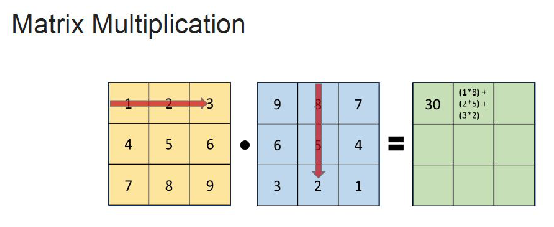

In [18]:
#vídeo

# Matrix multiplication
image = plt.imread(data_folder + "matrix_multiplication.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplots_adjust(left=0, bottom=0, right=1.25, top=1, wspace=0, hspace=0)
plt.show()

Exercício 2

In [19]:
%%script false

# Matrix Multiplication Part I

# Use the .head() method to view the contents of matrices a and b
print("Matrix A: ")
print (a.head())

print("Matrix B: ")
print (b.head())

# Complete the matrix with the product of matrices a and b
product = np.array([[10, 12], [15, 18]])

# Run this validation to see how your estimate performs
product == np.dot(a,b)

Couldn't find program: 'false'


Exercício 3

In [20]:
%%script false

# Matrix Multiplication Part II

# Print the dimensions of C
print(C.shape)  # (4, 5)

# Print the dimensions of D
print(D.shape)  # (3, 2)

# Can C and D be multiplied together?
C_times_D = None

Couldn't find program: 'false'


#### Exercício 4 - Overview of Matrix Factorization

Example of a factorization called LU factorization (same dimensions and with negative values):


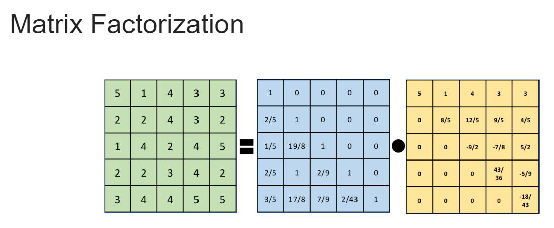


Here is another factorization (in this case all the values are positive - closer to what we need:


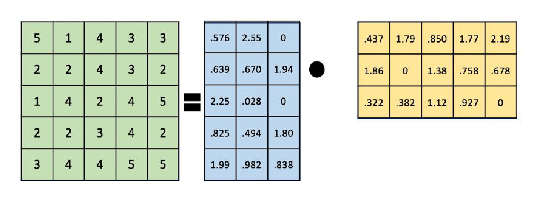

The dimensions of the factor matrices that don't match the original matrix are called the Rank, k, or
the number of latent features - in this case, 3. Remember that you get to choose the rank. 

Now look at this matrix - not all cells are filled, but it's still possible to factor the values in the matrix:
      Also, since there is at least 1 value in every row and at least 1 value in every column, each of the factor
      matrices are totally full.
      
      Hence, factoring a sparse matrix into 2 factor matrices not only approximates the values of the original matrix, 
      but also provide predictions for the missing cells in the original matrix.
      So since the factorization is based on the values that existed previously, the blank cells are filled in based on 
      the existing patterns. With user ratings, it reflects individual user behavior and of similar users - this is why
      this method is called collaborative filtering.


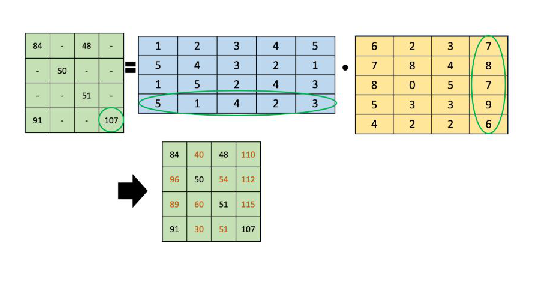

In [21]:
#vídeo

# Matrix Factorization/decomposition is essentially the opposite of matrix multiplication 
#  - rather than multiplying 2 matrices together, Matrix factorization splits a matrix into 2 or more matrices, which, when 
#    multiplied together gives an approximation of the original matrix.

# There are several mathematical approaches for this, each of which has a different application 
#  - (we are not going to see this, only what ALS performs)

######################################

# In Collaborative filtering, ALS uses a factorization called non-negative matrix factorization
# Since matrix factorization generally returns only approximations of the original matrix, in some cases they can return 
#  negative values in the factor matrices, even when attempting to predict positive values (for example, predicting 
#  a rating an user will give), which in this case doesn't make much sense. For this reason, a version of ALS that we will
#  be using will require that the factorization return only positive values.

#########################################

# Example - LU factorization
print("Example of a factorization called LU factorization (same dimensions and with negative values):")
image = plt.imread(data_folder + "LU_factorization.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplots_adjust(left=0, bottom=0, right=1.25, top=1, wspace=0, hspace=0)
plt.show()

print("=================================================================================\n")

print("Here is another factorization (in this case all the values are positive - closer to what we need:")
image = plt.imread(data_folder + "other_factorization_positive.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplots_adjust(left=0, bottom=0, right=1.25, top=1, wspace=0, hspace=0)
plt.show()

print("""The dimensions of the factor matrices that don't match the original matrix are called the Rank, k, or
the number of latent features - in this case, 3. Remember that you get to choose the rank. """)


print("=================================================================================\n")

print("""Now look at this matrix - not all cells are filled, but it's still possible to factor the values in the matrix:
      Also, since there is at least 1 value in every row and at least 1 value in every column, each of the factor
      matrices are totally full.
      
      Hence, factoring a sparse matrix into 2 factor matrices not only approximates the values of the original matrix, 
      but also provide predictions for the missing cells in the original matrix.
      So since the factorization is based on the values that existed previously, the blank cells are filled in based on 
      the existing patterns. With user ratings, it reflects individual user behavior and of similar users - this is why
      this method is called collaborative filtering.""")

image = plt.imread(data_folder + "filling_the_blanks.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplots_adjust(left=0, bottom=0, right=1.25, top=1, wspace=0, hspace=0)
plt.show()

Exercício 5

In [22]:
%%script false
# Matrix Factorization

# Matrix G is provided here as a Pandas dataframe. View it to understand what it looks like. Look at the possible factor
# matrices H, I, and J (also Pandas dataframes), and determine which two matrices will produce the matrix G when multiplied
# together.

# Take a look at Matrix G using the following print function
print("Matrix G:")
print(G)

# Take a look at the matrices H, I, and J and determine which pair of those matrices produce G when multiplied together.
print("Matrix H:")
print(H)
print("Matrix I:")
print(I)
print("Matrix J:")
print(J)

# Multiply the two matrices that are factors of the matrix G
prod = np.matmul(H, J)
print("H * J")
print(G == prod)

# Matrices H and J are factors of G.

Couldn't find program: 'false'


    Matrix G:
       0  1
    0  6  6
    1  3  3
    
    Matrix H:
       0  1
    0  2  2
    1  1  1
    
    Matrix I:
       0  1
    0  3  3
    1  3  3
    
    Matrix J:
       0  1
    0  1  1
    1  2  2
    
    H * J
    
          0     1
    0  True  True
    1  True  True

Exercício 6

In [23]:
%%script false
# Non-Negative Matrix Factorization

# It's possible for one matrix to have two equally close factorizations where one has all positive values and the other has
# some negative values.

# The matrix M has been factored twice using two different factorizations. 
# Take a look at each pair of factor matrices L and U, and W and H to see the differences. 
# Then use their products to see that they produce essentially the same product.

# View the L, U, W, and H matrices.
print("Matrices L and U:") 
print(L)
print(U)

print("Matrices W and H:")
print(W)
print(H)

# Calculate RMSE between LU and M
print("RMSE of LU: ", getRMSE(LU, M))

# Calculate RMSE between WH and M
print("RMSE of WH: ", getRMSE(WH, M))

Couldn't find program: 'false'


    Matrices L and U:
          0         1         2  3
    0  1.00  0.000000  0.000000  0
    1  0.01 -0.421053  0.098316  1
    2  1.00  0.000000  1.000000  0
    3  0.10  1.000000  0.000000  0
    
       0     1      2         3
    0  1  2.00  1.000  2.000000
    1  0 -0.19 -0.099 -0.198000
    2  0  0.00  1.000 -1.000000
    3  0  0.00  0.000  0.194947
    
    
    Matrices W and H:
          0     1     2     3
    0  2.61  0.24  0.00  0.12
    1  0.00  0.05  0.02  0.17
    2  1.97  0.00  0.58  0.83
    3  0.05  0.00  0.00  0.00
    
          0     1     2     3
    0  0.38  0.65  0.34  0.41
    1  0.00  1.20  0.15  3.72
    2  0.42  1.09  1.38  0.07
    3  0.00  0.11  0.65  0.17
    
    RMSE of LU:  0.072
    RMSE of WH:  0.072
    
LU and WH essentailly created the same product despite LU having some negative values and WH having all positive values.

#### Exercício 7 - How ALS alternates to generate predictions

Most of the original matrix is filled in blank since it's unreasonable that a normal person whatches all 
existing movies.


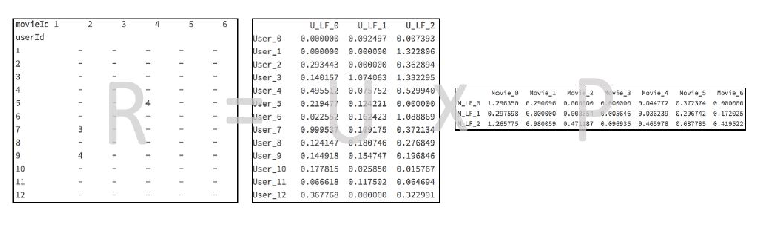

To get the closest approximation to the (original) matrix R, ALS first generates a matrix U with random numbers, 
and then adjusts the matrix P to get the best possible approximation. So R and U are constant and P flexible/adjusted.
It then iteratly multiplies U and P and check how far the predictions are from the original matrix: it uses RMSE, or the 
root mean squared error, as an error metric.
When calculating the RMSE, only values that existed in the original matrix are considered, the missing values not.
ALS then maintains P constant and adjusts U, and it switches like this iteratively until we have the best approximation.
In the end, the 2 matrices are multiplied back together and we get a matrix with predictions.


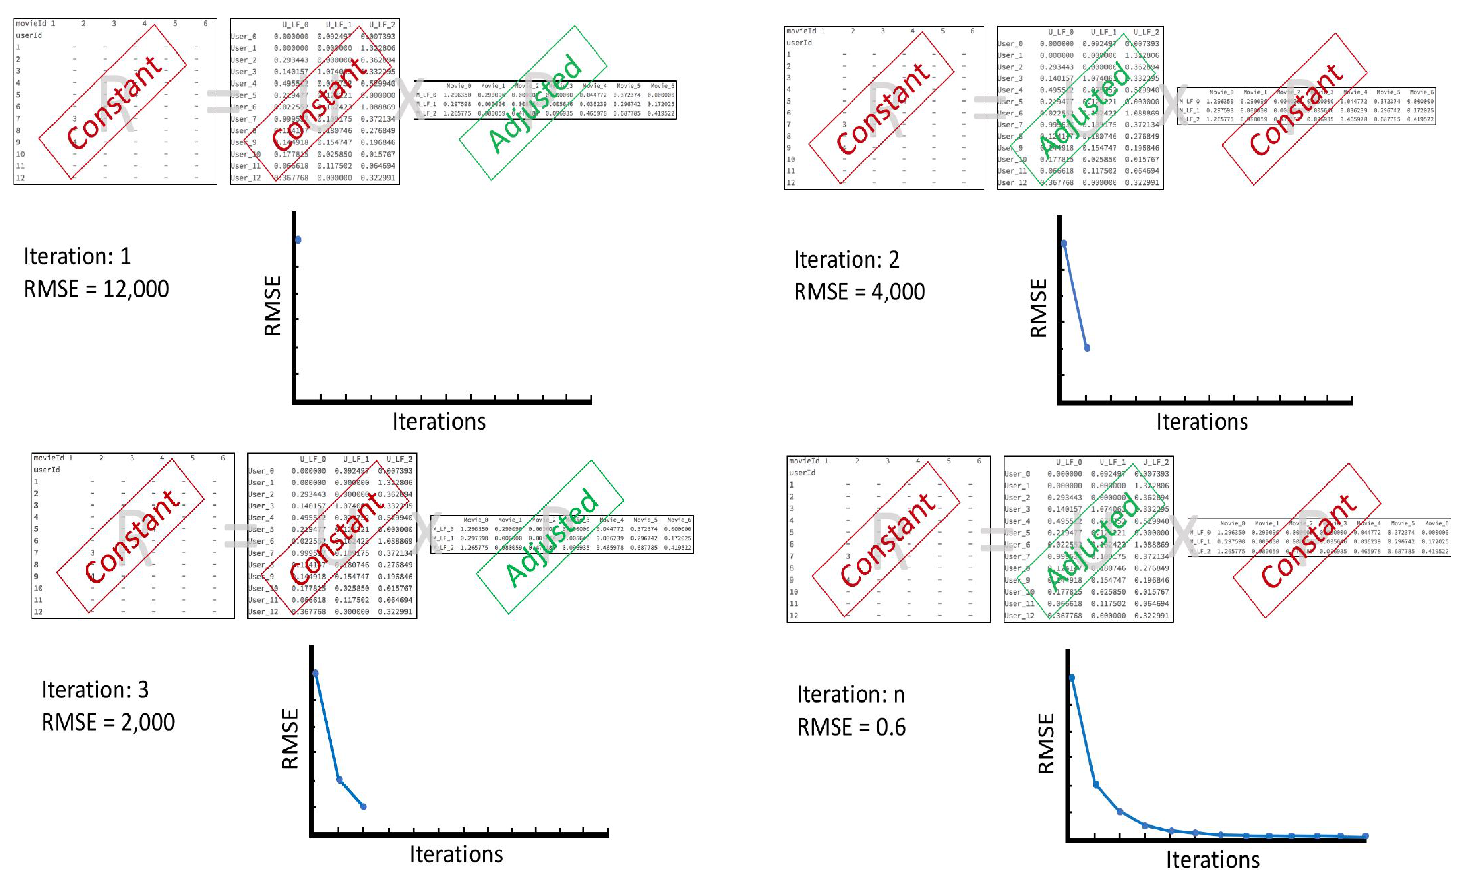

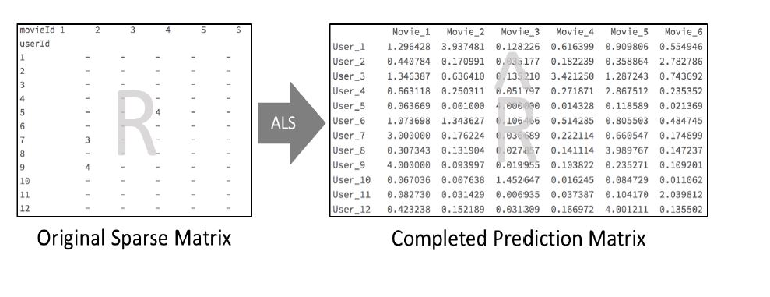

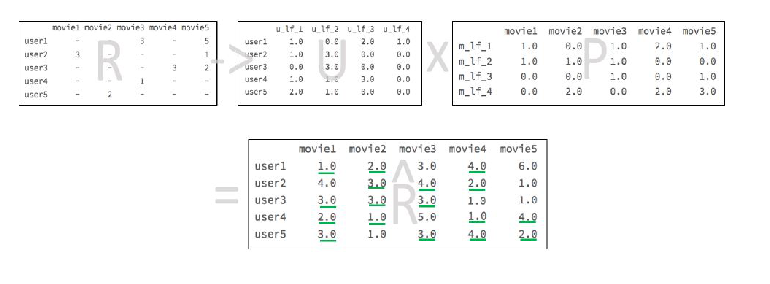

In [24]:
#vídeo

print("""Most of the original matrix is filled in blank since it's unreasonable that a normal person whatches all 
existing movies.""")

image = plt.imread(data_folder + "als_alternates0.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplots_adjust(left=0, bottom=0, right=1.75, top=1, wspace=0, hspace=0)
plt.show()

print("""To get the closest approximation to the (original) matrix R, ALS first generates a matrix U with random numbers, 
and then adjusts the matrix P to get the best possible approximation. So R and U are constant and P flexible/adjusted.
It then iteratly multiplies U and P and check how far the predictions are from the original matrix: it uses RMSE, or the 
root mean squared error, as an error metric.
When calculating the RMSE, only values that existed in the original matrix are considered, the missing values not.
ALS then maintains P constant and adjusts U, and it switches like this iteratively until we have the best approximation.
In the end, the 2 matrices are multiplied back together and we get a matrix with predictions.""")

plt.subplot(2, 2, 1)
image = plt.imread(data_folder + "als_alternates1.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplot(2, 2, 2)
image = plt.imread(data_folder + "als_alternates2.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplot(2, 2, 3)
image = plt.imread(data_folder + "als_alternates3.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplot(2, 2, 4)
image = plt.imread(data_folder + "als_alternates4.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplots_adjust(left=0, bottom=-2, right=3.5, top=1, wspace=0, hspace=0)
plt.show()

print("==================================================================================================================")

image = plt.imread(data_folder + "als_alternates5.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplots_adjust(left=0, bottom=0, right=1.75, top=1, wspace=0, hspace=0)
plt.show()

print("==================================================================================================================")

image = plt.imread(data_folder + "als_alternates6.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplots_adjust(left=0, bottom=0, right=1.75, top=1, wspace=0, hspace=0)
plt.show()

Exercício 8

In [25]:
%%script false

# Estimating Recommendations

# Use your knowledge of matrix multiplication to determine which movie will have the highest recommendation for User_3. 
# The ratings matrix has been factorized into U and P with ALS.

########################################

# View left factor matrix
print(U)

# View right factor matrix
print(P)

# Multiply factor matrices
UP = np.matmul(U, P)

# Convert to pandas DataFrame
print(pd.DataFrame(UP, columns = P.columns, index = U.index))

Couldn't find program: 'false'


Matrix U:

             U_LF_1  U_LF_2  U_LF_3  U_LF_4
    User_1    0.80    0.01    0.30     0.8
    User_2    0.40    0.01    0.06     0.2
    User_3    0.05    2.10    0.01     2.2
    User_4    0.30    0.01    0.20     0.2
    User_5    0.10    1.50    0.90     0.0
    User_6    0.00    0.03    0.40     0.5
    User_7    0.01    0.02    0.66     0.4
    User_8    0.90    0.70    0.00     1.0
    User_9    1.00    2.00    0.04     0.2
    
Matrix P:

            Movie_1  Movie_2  Movie_3  Movie_4
    P_LF_1      0.5      0.1      0.4     1.10
    P_LF_2      0.2      2.0      0.0     0.01
    P_LF_3      0.3      1.9      0.6     0.90
    P_LF_4      1.0      0.2      1.0     0.89
    
Final predictions matrix: U * P:

             U_LF_1  U_LF_2  U_LF_3  U_LF_4
    User_1   1.292   0.830   1.300  1.8621
    User_2   0.420   0.214   0.396  0.6721
    User_3   2.648   4.664   2.226  2.0430
    User_4   0.412   0.470   0.440  0.6881
    User_5   0.620   4.720   0.580  0.9350
    User_6   0.626   0.920   0.740  0.8053
    User_7   0.607   1.375   0.800  0.9612
    User_8   1.590   1.690   1.360  1.8870
    User_9   1.112   4.216   0.624  1.3340
    
The highest recommendation for User_3 is movie 2, for example

Exercício 9

In [26]:
%%script false

# RMSE As ALS Alternates

# As you know, ALS will alternate between the two factor matrices, adjusting their values each time to iteratively come 
# closer and closer to approximating the original ratings matrix. This exercise is intended to illustrate this to you.

# Matrix T is a ratings matrix, and matrices F1, F2, F3, F4, F5, and F6 are the respective products of ALS after iterating 
# 2, 3, 4, 5, and 6 times respectively. Follow the instructions below to see how the RMSE changes as ALS iterates.

#########################################

# Use getRMSE(preds, actuals) to calculate the RMSE of matrices T and F1.
getRMSE(F1, T)

# Create list of F2, F3, F4, F5, and F6
Fs = [F2, F3, F4, F5, F6]

# Calculate RMSE for F2, F3, F4, F5, and F6.
getRMSEs(Fs, T)


Couldn't find program: 'false'


    F1: 2.4791263858912522
    F2: 0.4389326310548279
    F3: 0.17555006757053257
    F4: 0.15154042416388636
    F5: 0.13191130368008455
    F6: 0.04533823201006271

#### Exercício 10 - Data Preparation for Spark ALS

In [27]:
%%script false
#vídeo

# Conventional dataframes
# many algorithms in pyspark, ALS included, require the format to be Row-based data format

# also, must turn the conventional dataframes into integers only (for Spark)

# Function to convert conventional datafame into row-based ("long") dataframe
long_ratings = wide_to_long(ratings)    # n vemos os detalhes desta função wide_to_long --> ver o link no próximo ex.


# Steps to Get Integer Id's

# 1. Extract unique userIds and movieIds
# 2. Assign unique integers to each id
# 3. Rejoin unique integer id's back to the ratings data

users = long_ratings.select('userId').distinct()

# Monotonically Increasing ID
from pyspark.sql.functions import monotonically_increasing_id    
                    # This assign an unique integer to each row of the users df.
                      # we need to be careful when using this because it will treat each partition of data independently,
                      # so the same integer can be used in different partitions. 
                      # In order to get around this, we convert our data into one partition using the coalesce method.
            
                      # Also note that while the integers will be increasing by a value of 1 over each row, they may not
                      # necessarily start at 1. But what's really important is that they are unique

# Coalesce Method
from pyspark.sql.functions import monotonically_increasing_id
users = users.coalesce(1)                               

# Persist Method
from pyspark.sql.functions import monotonically_increasing_id
users = users.coalesce(1)
users = users.withColumn("userIntId", monotonically_increasing_id()).persist()  # persist() so that it doesn't change the 
                                                                                # assigned values

# Movie Integer Ids
movies = long_ratings.select("variable").distinct()
movies = movies.coalesce(1)
movies = movies.withColumn("movieId", monotonically_increasing_id()).persist()

# Joining UserIds and MovieIds
ratings_w_int_ids = long_ratings.join(users, "userId", "left").join(movies, "variable", "left")


# final step
from pyspark.ml.functions import col

ratings_data = ratings_w_int_ids.select(col("userIntId").alias("userId"),
                                        col("variable").alias("movieId"),
                                        col("rating"))
ratings_data.show()

Couldn't find program: 'false'


    +------+-------+------+
    |userId|movieId|rating|
    +------+-------+------+
    |  16  |   3   |   2  |
    |  16  |   4   |   3  |
    |  16  |   2   |   4  |
    |  16  |   1   |   4  |
    |  3   |   3   |   1  |
    |  3   |   0   |   4  |
    |  3   |   2   |   3  |
    |  3   |   1   |   4  |
    |  1   |   3   |   3  |
    |  1   |   4   |   4  |
    |  1   |   2   |   3  |
    |  1   |   1   |   5  |
    |  11  |   3   |   1  |
    |  11  |   4   |   2  |
    |  11  |   0   |   4  |
    |  11  |   2   |   5  |
    +------+-------+------+

Exercício 11

In [28]:
# Import SparkSession from pyspark.sql
from pyspark.sql import SparkSession

# Create my_spark
spark = SparkSession.builder.getOrCreate()
spark

In [29]:
from pyspark.sql import *
from pyspark.sql.types import *

# create R dataframe in spark
columns = Row("User", "Shrek", "Coco", "Swing Kids", "Sneakers")
row1 = columns('James Alking', 3, 4, 4, 3)
row2 = columns('Elvira Marroquin', 4, 5, None, 2)
row3 = columns('Jack Bauer', None, 2, 2, 5)
row4 = columns('Julia James', 5, None, 2, 2)

schema = StructType([StructField("User", StringType(), False),
                     StructField("Shrek", IntegerType(), True),
                     StructField("Coco", IntegerType(), True),
                     StructField("Swing Kids", IntegerType(), True),
                     StructField("Sneakers", IntegerType(), True)])

R = spark.createDataFrame([row1, row2, row3, row4], schema)
R.show()

print(R.columns)

+----------------+-----+----+----------+--------+
|            User|Shrek|Coco|Swing Kids|Sneakers|
+----------------+-----+----+----------+--------+
|    James Alking|    3|   4|         4|       3|
|Elvira Marroquin|    4|   5|      null|       2|
|      Jack Bauer| null|   2|         2|       5|
|     Julia James|    5|null|         2|       2|
+----------------+-----+----+----------+--------+

['User', 'Shrek', 'Coco', 'Swing Kids', 'Sneakers']


In [30]:
# to_long() formula  --> turns the conventional dataframe into a row-based ("long") dataframe

#########################

# https://github.com/jamenlong/ALS_expected_percent_rank_cv/blob/master/wide_to_long_function.py

# ---> alterei    to_long(df, by = ["userId"])    para    to_long(df, by = ["User"])    para dar
#            e    "movieId" para "Movie" em kvs e long_df

#########################

# This function was originally provided for use in converting the MovieLens ratings dataframe from a conventional/"wide"
# dataframe to a row-based/"long" dataframe.

from pyspark.sql.functions import array, col, explode, lit, struct

def to_long(df, by = ["User"]): # "by" is the column by which you want the final output dataframe to be grouped by
    
    cols = [c for c in df.columns if c not in by] 
    
    kvs = explode(array([struct(lit(c).alias("Movie"), col(c).alias("rating")) for c in cols])).alias("kvs") 
    
    long_df = df.select(by + [kvs]).select(by + ["kvs.Movie", "kvs.rating"]).filter("rating IS NOT NULL")
    # Excluding null ratings values since ALS in Pyspark doesn't want blank/null values
             
    return long_df


In [31]:
# Correct format and distinct users

# Take a look at the R dataframe. Notice that it is in conventional or "wide" format with a different movie in each column. 
# Also notice that the User's and movie names are not in integer format. Follow the steps to properly prepare this data for
# ALS.

# Import monotonically_increasing_id and show R
from pyspark.sql.functions import monotonically_increasing_id

# Use the to_long() function to convert the dataframe to the "long" format.
ratings = to_long(R)  
ratings.show()

# Get unique users and repartition to 1 partition
users = ratings.select("User").distinct().coalesce(1)

# Create a new column of unique integers called "userId" in the users dataframe.
users = users.withColumn("userId", monotonically_increasing_id()).persist()
users.show()

print("Each user now has a unique integer assigned to it.")

+----------------+----------+------+
|            User|     Movie|rating|
+----------------+----------+------+
|    James Alking|     Shrek|     3|
|    James Alking|      Coco|     4|
|    James Alking|Swing Kids|     4|
|    James Alking|  Sneakers|     3|
|Elvira Marroquin|     Shrek|     4|
|Elvira Marroquin|      Coco|     5|
|Elvira Marroquin|  Sneakers|     2|
|      Jack Bauer|      Coco|     2|
|      Jack Bauer|Swing Kids|     2|
|      Jack Bauer|  Sneakers|     5|
|     Julia James|     Shrek|     5|
|     Julia James|Swing Kids|     2|
|     Julia James|  Sneakers|     2|
+----------------+----------+------+

+----------------+------+
|            User|userId|
+----------------+------+
|Elvira Marroquin|     0|
|      Jack Bauer|     1|
|    James Alking|     2|
|     Julia James|     3|
+----------------+------+

Each user now has a unique integer assigned to it.


Exercício 12

In [32]:
# Assigning integer id's to movies

# Extract the distinct movie id's
movies = ratings.select("Movie").distinct() 

# Repartition the data to have only one partition.
movies = movies.coalesce(1) 

# Create a new column of movieId integers. 
movies = movies.withColumn("movieId", monotonically_increasing_id()).persist() 


# Join the ratings, users and movies dataframes
movie_ratings = ratings.join(users, "User", "left").join(movies, "Movie", "left")
movie_ratings.show()

+----------+----------------+------+------+-------+
|     Movie|            User|rating|userId|movieId|
+----------+----------------+------+------+-------+
|  Sneakers|    James Alking|     3|     2|      0|
|  Sneakers|Elvira Marroquin|     2|     0|      0|
|  Sneakers|      Jack Bauer|     5|     1|      0|
|  Sneakers|     Julia James|     2|     3|      0|
|      Coco|    James Alking|     4|     2|      1|
|      Coco|Elvira Marroquin|     5|     0|      1|
|      Coco|      Jack Bauer|     2|     1|      1|
|Swing Kids|    James Alking|     4|     2|      2|
|Swing Kids|      Jack Bauer|     2|     1|      2|
|Swing Kids|     Julia James|     2|     3|      2|
|     Shrek|    James Alking|     3|     2|      3|
|     Shrek|Elvira Marroquin|     4|     0|      3|
|     Shrek|     Julia James|     5|     3|      3|
+----------+----------------+------+------+-------+



#### Exercício 13 - ALS Parameters and Hyperparameters

In [33]:
%%script false
#vídeo

from pyspark.ml.recommendation import ALS

# Example ALS Model Code
als_model = ALS(userCol="userId", itemCol="movieId", ratingCol="rating", 
                rank=25, maxIter=100, regParam=.05, alpha=40, 
                nonnegative=True, 
                coldStartStrategy="drop",
                implicitPrefs=False)

# userCol: Name of column that contains user id's
# itemCol: Name of column that contains item id's
# ratingCol: Name of column that contains ratings

# Hyperparameters

# rank, k: number of latent features
# maxIter: number of iterations
# regParam: (Lambda)   ---> number that is added to the error metric to avoid the algorithm converting to rapidly and
#                         overfitting to the training data.
# alpha: Discussed later. Only used with implicit ratings.

# nonnegative = True: Ensures positive numbers
# coldStartStrategy = "drop": Addresses issues with test/train split
# implicitPrefs = True: True/False depending on ratings type

############################################

# Fit ALS to training dataset
model = als_model.fit(training_data)

# Generate predictions on test dataset
predictions = model.transform(test_data)


Couldn't find program: 'false'


Exercício 14

In [34]:
movie_ratings.show()

+----------+----------------+------+------+-------+
|     Movie|            User|rating|userId|movieId|
+----------+----------------+------+------+-------+
|     Shrek|    James Alking|     3|     2|      3|
|      Coco|    James Alking|     4|     2|      1|
|Swing Kids|    James Alking|     4|     2|      2|
|  Sneakers|    James Alking|     3|     2|      0|
|     Shrek|Elvira Marroquin|     4|     0|      3|
|      Coco|Elvira Marroquin|     5|     0|      1|
|  Sneakers|Elvira Marroquin|     2|     0|      0|
|      Coco|      Jack Bauer|     2|     1|      1|
|Swing Kids|      Jack Bauer|     2|     1|      2|
|  Sneakers|      Jack Bauer|     5|     1|      0|
|     Shrek|     Julia James|     5|     3|      3|
|Swing Kids|     Julia James|     2|     3|      2|
|  Sneakers|     Julia James|     2|     3|      0|
+----------+----------------+------+------+-------+



In [35]:
#Schema 
movie_ratings.printSchema()

# vou gerar este:
ratings2 = movie_ratings.select(movie_ratings.userId.cast("integer"),
                                movie_ratings.movieId.cast("integer"), 
                                movie_ratings.rating.cast("double"))

ratings2.printSchema()

root
 |-- Movie: string (nullable = false)
 |-- User: string (nullable = false)
 |-- rating: integer (nullable = true)
 |-- userId: long (nullable = true)
 |-- movieId: long (nullable = true)

root
 |-- userId: integer (nullable = true)
 |-- movieId: integer (nullable = true)
 |-- rating: double (nullable = true)



In [36]:
%%script false # n deu --ver erro

# Build Out An ALS Model

# Recall that you can use the .columns method on the ratings data frame to see what the names of the columns are that 
# contain user, movie, and ratings data. Spark needs to know the names of these columns in order to perform ALS correctly.

# vou gerar este:
# ratings2 = movie_ratings[['userId', 'movieId', 'rating']]

print("ratings2 dataframe columns:", ratings2.columns, "\n")

# Split the ratings dataframe into training and test data
training_data, test_data = ratings2.randomSplit([0.8, 0.2], seed=1234)

# Set the ALS hyperparameters
from pyspark.ml.recommendation import ALS

als = ALS(userCol="userId", itemCol="movieId", ratingCol="rating", 
          rank=10, maxIter=15, regParam =0.1,
          coldStartStrategy="drop", nonnegative=True, implicitPrefs = False)

# Fit the model to the training_data
model = als.fit(training_data)

# Generate predictions on the test_data
test_predictions = model.transform(test_data)
test_predictions.show()

Couldn't find program: 'false'


Exercício 15

In [37]:
# Build RMSE Evaluator

# Now that you know how to fit a model to training data and generate test predictions, you need a way to evaluate how well
# your model performs. For this we'll build an evaluator. Evaluators in Spark can be built out in various ways. For our 
# purposes, we want a regressionEvaluator that calculates the RMSE. After we build our regressionEvaluator, we can fit the
# model to our data and generate predictions.

# Import RegressionEvaluator
from pyspark.ml.evaluation import RegressionEvaluator

# Complete the evaluator code
evaluator = RegressionEvaluator(metricName="rmse", labelCol="rating", predictionCol="prediction")

# Extract the 3 parameters
print(evaluator.getMetricName())
print(evaluator.getLabelCol())
print(evaluator.getPredictionCol())


rmse
rating
prediction


Exercício 16

In [38]:
%%script false
# Get RMSE

# Now that you know how to build a model and generate predictions, and have an evaluator to tell us how well it predicts 
# ratings, we can calculate the RMSE to see how well an ALS model performed. 

# Evaluate the "test_predictions" dataframe
RMSE = evaluator.evaluate(test_predictions)

# Print the RMSE
print(RMSE)

# 0.16853197489754093
# This RMSE means that on average, the model's test predictions are about .16 off from the true values.

Couldn't find program: 'false'


# Chapter 3 - Recommending Movies

#### Exercício 1 - Introduction to the MovieLens dataset

MOVIELENS DATASET:

F. Maxwell Harper and Joseph A. Konstan. 2015
The MovieLens Datasets: History and Context.
ACM Transitions on Interactive Intelligent Systems (TiiS) 5, 4, Article 19 (December
2015), 19 Pages. DOI=http://dx.doi.org/10.1145/2827872

Kaggle subset w/ 100K: https://www.kaggle.com/prajitdatta/movielens-100k-dataset

+------+-------+------+---------+
|userId|movieId|rating|timestamp|
+------+-------+------+---------+
|   196|    242|     3|881250949|
|   186|    302|     3|891717742|
|    22|    377|     1|878887116|
|   244|     51|     2|880606923|
|   166|    346|     1|886397596|
|   298|    474|     4|884182806|
|   115|    265|     2|881171488|
|   253|    465|     5|891628467|
|   305|    451|     3|886324817|
|     6|     86|     3|883603013|
|    62|    257|     2|879372434|
|   286|   1014|     5|879781125|
|   200|    222|     5|876042340|
|   210|     40|     3|891035994|
|   224|     29|     3|888104457|
|   303|    785|     3|879485318|
|   122|    387|     5|879270459|
|   194|    274|     2|879539794|
|   291|   1042|     4|874834944|
|   234|   1184|     2|892079237|
+------+-------+------+---------+
only showing top 20 rows



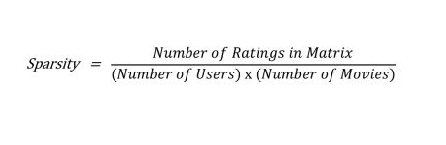

Sparsity (a measure of how empty a matrix is):  0.1875 

Number of songs plays by user
+----------------+-----+
|            User|count|
+----------------+-----+
|Elvira Marroquin|    3|
|      Jack Bauer|    3|
|    James Alking|    4|
|     Julia James|    3|
+----------------+-----+

Minimum number of song plays by userId
+----------+
|min(count)|
+----------+
|         3|
+----------+

Maximum number of song plays by userId
+----------+
|max(count)|
+----------+
|         4|
+----------+

Average number of song plays by userId
+----------+
|avg(count)|
+----------+
|      3.25|
+----------+

Filter that Removes users with less than 4 ratings
+------------+-----+
|        User|count|
+------------+-----+
|James Alking|    4|
+------------+-----+



In [39]:
#vídeo

# We will see a subset of the original data with 20 million, of 100K ratings --> tirei do Kaggle

# Ratings: 20,00263
# Users: 138,493
# Movies: 27,278

df = spark.read.csv(data_folder + "data_final.csv", header=True)

# Explore the Data
df.show()
df.columns

# MovieLens Sparsity
image = plt.imread(data_folder + "sparsity.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

print("=======================================================================================================")

##########################################################################################################

# Sparsity 

# Numerator: Number of ratings in matrix
numerator = ratings.count()

# Distinct users and movies
users = ratings.select("User").distinct().count()
movies = ratings.select("Movie").distinct().count()

# Denominator: Number of ratings in matrix
# Number of ratings matrix could contain if no empty cells
denominator = users * movies


# Compute Sparsity
sparsity = 1 - (numerator*1.0 / denominator)   # *1.0 to ensure a float is returned
print("Sparsity (a measure of how empty a matrix is): ", sparsity, "\n")

###################################################

# The .distinct() Method
ratings.select("User").distinct().count()


# GroupBy Method

# Group by userId
ratings.groupBy("User")

# Number of songs plays by user
print("Number of songs plays by user")
ratings.groupBy("User").count().show()


from pyspark.sql.functions import min, max, avg

# GroupBy Method Min

# Min num of song plays by userId
print("Minimum number of song plays by userId")
ratings.groupBy("User").count().select(min("count")).show()

# GroupBy Method Max

# Max num of song plays by userId
print("Maximum number of song plays by userId")
ratings.groupBy("User").count().select(max("count")).show()

# GroupBy Method Avg

# Avg num of song plays by userId
print("Average number of song plays by userId")
ratings.groupBy("User").count().select(avg("count")).show()

###################

# Filter Method
# Removes users with less than 4 ratings
print("Filter that Removes users with less than 4 ratings")
ratings.groupBy("User").count().filter(col("count") >= 4).show()


Exercício 2

In [40]:
# Viewing the MovieLens Data

# Familiarize yourself with the ratings dataset provided here. 
# Would you consider the data to be implicit or explicit ratings?

ratings = df

# Look at the column names
print(ratings.columns, "\n")

# Look at the first few rows of data
print(ratings.show())

print("explicit ratings")

['userId', 'movieId', 'rating', 'timestamp'] 

+------+-------+------+---------+
|userId|movieId|rating|timestamp|
+------+-------+------+---------+
|   196|    242|     3|881250949|
|   186|    302|     3|891717742|
|    22|    377|     1|878887116|
|   244|     51|     2|880606923|
|   166|    346|     1|886397596|
|   298|    474|     4|884182806|
|   115|    265|     2|881171488|
|   253|    465|     5|891628467|
|   305|    451|     3|886324817|
|     6|     86|     3|883603013|
|    62|    257|     2|879372434|
|   286|   1014|     5|879781125|
|   200|    222|     5|876042340|
|   210|     40|     3|891035994|
|   224|     29|     3|888104457|
|   303|    785|     3|879485318|
|   122|    387|     5|879270459|
|   194|    274|     2|879539794|
|   291|   1042|     4|874834944|
|   234|   1184|     2|892079237|
+------+-------+------+---------+
only showing top 20 rows

None
explicit ratings


Exercício 3

In [41]:
# Calculate sparsity

# As you know, ALS works well with sparse datasets. Let's see how much of the ratings matrix is actually empty.

# Remember that sparsity is calculated by the number of cells in a matrix that contain a rating divided by the total number
# of values that matrix could hold given the number of users and items (movies). In other words, dividing the number of 
# ratings present in the matrix by the product of users and movies in the matrix and subtracting that from 1 will give us
# the sparsity or the percentage of the ratings matrix that is empty.

# Count the total number of ratings in the dataset
numerator = ratings.select("rating").count()

# Count the number of distinct userIds and distinct movieIds
num_users = ratings.select("userId").distinct().count()
num_movies = ratings.select("movieId").distinct().count()

# Set the denominator equal to the number of users multiplied by the number of movies
denominator = num_users * num_movies

# Divide the numerator by the denominator
sparsity = (1.0 - (numerator *1.0)/denominator)*100
print("The ratings dataframe is ", "%.2f" % sparsity + "% empty. There is a lot of missing data.")


The ratings dataframe is  93.70% empty. There is a lot of missing data.


Exercício 4

In [42]:
# The GroupBy and Filter Methods

# Now that we know a little more about the dataset, let's look at some general summary metrics of the ratings dataset and
# see how many ratings the movies have and how many ratings each users has provided.

# Two common methods that will be helpful to you as you aggregate summary statistics in Spark are the .filter() and the 
# .groupBy() methods. The .filter() method allows you to filter out any data that doesn't meet your specified criteria.

# Import the requisite packages
from pyspark.sql.functions import col

# View the ratings dataset
ratings.show()

# Filter to show only userIds less than 100
ratings.filter(col("userId") < 100).show()

# Group data by userId, count ratings
ratings.groupBy("userId").count().show()

+------+-------+------+---------+
|userId|movieId|rating|timestamp|
+------+-------+------+---------+
|   196|    242|     3|881250949|
|   186|    302|     3|891717742|
|    22|    377|     1|878887116|
|   244|     51|     2|880606923|
|   166|    346|     1|886397596|
|   298|    474|     4|884182806|
|   115|    265|     2|881171488|
|   253|    465|     5|891628467|
|   305|    451|     3|886324817|
|     6|     86|     3|883603013|
|    62|    257|     2|879372434|
|   286|   1014|     5|879781125|
|   200|    222|     5|876042340|
|   210|     40|     3|891035994|
|   224|     29|     3|888104457|
|   303|    785|     3|879485318|
|   122|    387|     5|879270459|
|   194|    274|     2|879539794|
|   291|   1042|     4|874834944|
|   234|   1184|     2|892079237|
+------+-------+------+---------+
only showing top 20 rows

+------+-------+------+---------+
|userId|movieId|rating|timestamp|
+------+-------+------+---------+
|    22|    377|     1|878887116|
|     6|     86|     3

In [43]:
# Now you know how to groupBy() and filter() pyspark dataframes. In the next exercise we are going to combine these two 
# methods. If you want to apply two filters, you can do so like this: 

ratings.filter((col('userId') < 100) & (col('userId') > 50)).show()

+------+-------+------+---------+
|userId|movieId|rating|timestamp|
+------+-------+------+---------+
|    62|    257|     2|879372434|
|    95|    546|     2|879196566|
|    63|    277|     4|875747401|
|    97|    194|     3|884238860|
|    99|      4|     5|886519097|
|    81|    432|     2|876535131|
|    59|    196|     5|888205088|
|    72|    679|     2|880037164|
|    87|    384|     4|879877127|
|    60|    427|     5|883326620|
|    57|    304|     5|883698581|
|    92|   1049|     1|890251826|
|    95|    625|     4|888954412|
|    87|   1016|     4|879876194|
|    62|    498|     4|879373848|
|    62|    382|     3|879375537|
|    90|    382|     5|891383835|
|    58|    144|     4|884304936|
|    90|    648|     4|891384754|
|    62|     21|     3|879373460|
+------+-------+------+---------+
only showing top 20 rows



Exercício 5

In [44]:
# MovieLens Summary Statistics

# Let's take the groupBy() method a bit further.
# Once you've applied the .groupBy() method to a dataframe, you can subsequently run aggregate functions such as .sum(), 
# .avg(), .min() and have the results grouped. This exercise will walk you through how this is done.

from pyspark.sql.functions import min, avg

# Min num ratings for movies
print("Movie with the fewest ratings: ")
ratings.groupBy("movieId").count().select(min("count")).show()

# Avg num ratings per movie
print("Avg num ratings per movie: ")
ratings.groupBy("movieId").count().select(avg("count")).show()

# Min num ratings for user
print("User with the fewest ratings: ")
ratings.groupBy("userId").count().select(min("count")).show()

# Avg num ratings per users
print("Avg num ratings per user: ")
ratings.groupBy("userId").count().select(avg("count")).show()


Movie with the fewest ratings: 
+----------+
|min(count)|
+----------+
|         1|
+----------+

Avg num ratings per movie: 
+-----------------+
|       avg(count)|
+-----------------+
|59.45303210463734|
+-----------------+

User with the fewest ratings: 
+----------+
|min(count)|
+----------+
|        20|
+----------+

Avg num ratings per user: 
+------------------+
|        avg(count)|
+------------------+
|106.04453870625663|
+------------------+



In [45]:
# That's right. Users have at least 20 ratings and on average of 106 ratings. 
# And movies have at least 1 rating with an average of 59 ratings.

Exercício 6

In [46]:
# View Schema

# As you know from previous chapters, Spark's implementation of ALS requires that movieIds and userIds be provided as 
# integer datatypes. Many datasets need to be prepared accordingly in order for them to function properly with Spark.
# A common issue is that Spark thinks numbers are strings, and vice versa.
# Here, you'll use the .cast() method to address these types of problems. Let's take a look at the schema of the dataset 
# to ensure it's in the correct format.

# Use .printSchema() to see the datatypes of the ratings dataset
ratings.printSchema()

# Tell Spark to convert the columns to the proper data types
ratings = ratings.select(ratings.userId.cast("integer"), ratings.movieId.cast("integer"), ratings.rating.cast("double"))

# Call .printSchema() again to confirm the columns are now in the correct format
ratings.printSchema()

root
 |-- userId: string (nullable = true)
 |-- movieId: string (nullable = true)
 |-- rating: string (nullable = true)
 |-- timestamp: string (nullable = true)

root
 |-- userId: integer (nullable = true)
 |-- movieId: integer (nullable = true)
 |-- rating: double (nullable = true)



#### Exercício 7 - ALS model buildout on MovieLens Data

In [47]:
%%script false

#vídeo

# Fitting a Basic Model

# Split data
(training_data, test_data) = ratings2.randomSplit([0.8, 0.2])

# Build ALS model
from pyspark.ml.recommendation import ALS

als = ALS(userCol="userId", itemCol="movieId", ratingCol="rating", rank=25, 
          maxIter=100, regParam=.05, nonnegative=True, coldStartStrategy="drop", implicitPrefs=False)

# Fit model to training data
model = als.fit(training_data)

# Generate predictions on test_data
predictions = model.transform(test_data)

# Tell Spark how to evaluate predictions
evaluator = RegressionEvaluator(metricName="rmse", labelCol="rating", predictionCol="prediction")

# Obtain and print RMSE
rmse = evaluator.evaluate(predictions)
print("RMSE: {}".format(rmse))

##########

# Intro to ParamGridBuilder and CrossValidator
ParamGridBuilder()
CrossValidator()

# Imports ParamGridBuilder package
from pyspark.ml.tuning import ParamGridBuilder

# Creates a ParamGridBuilder
param_grid = ParamGridBuilder()


# ---> Adding Hyperparameters to the ParamGridBuilder

from pyspark.ml.tuning import ParamGridBuilder

# Creates a ParamGridBuilder, and add hyperparameters and values
param_grid = ParamGridBuilder().addGrid(als.rank, [5, 40, 80, 120])
                               .addGrid(als.maxIter, [5, 100, 250, 500])
                               .addGrid(als.regParam, [.05, .1, 1.5])
                               .build()
            
################

# CrossValidator

# Imports CrossValidator package
from pyspark.ml.tuning import CrossValidator

# Creates cross validator and tells Spark what to use when training # and evaluating
cv = CrossValidator(estimator = als, estimatorParamMaps = param_grid, evaluator = evaluator, numFolds = 5)

##################################################################################################################

Couldn't find program: 'false'


In [48]:
%%script false
ratings2 = ratings

# Split data
(training, test) = ratings2.randomSplit([0.8, 0.2])

# Build ALS model
from pyspark.ml.recommendation import ALS

als = ALS(userCol="userId", itemCol="movieId", ratingCol="rating", rank=25, 
          maxIter=100, regParam=.05, nonnegative=True, coldStartStrategy="drop", implicitPrefs=False)

# Tell Spark what values to try for each hyperparameter
from pyspark.ml.tuning import ParamGridBuilder

param_grid = ParamGridBuilder().addGrid(als.rank, [5, 40, 80, 120]).addGrid(als.maxIter, [5, 100, 250, 500]).addGrid(als.regParam, [.05, .1, 1.5]).build()
            
# Tell Spark how to evaluate model performance
evaluator = RegressionEvaluator(metricName="rmse", labelCol="rating", predictionCol="prediction")

# Build cross validation step using CrossValidator
from pyspark.ml.tuning import CrossValidator

cv = CrossValidator(estimator = als, estimatorParamMaps = param_grid, evaluator = evaluator, numFolds = 5)

# Run the cv on the training data
model = cv.fit(training)

# Extract best combination of values from cross validation
best_model = model.bestModel


#####

# Predictions and Performance Evaluation

# Extract best combination of values from cross validation
best_model = model.bestModel

# Generate test set predictions and evaluate using RMSE
predictions = best_model.transform(test)
rmse = evaluator.evaluate(predictions)

# Print evaluation metrics and model parameters
print ("**Best Model**")
print ("RMSE = "), rmse
print (" Rank: "), best_model.rank
print (" MaxIter: "), best_model._java_obj.parent().getMaxIter()
print (" RegParam: "), best_model._java_obj.parent().getRegParam()


Couldn't find program: 'false'


Exercício 8

In [49]:
# Create test/train splits and build your ALS model

# Import ALS
from pyspark.ml.recommendation import ALS

# Create test and train set
(train, test) = ratings.randomSplit([0.80, 0.20], seed = 1234)

# Create ALS model
als = ALS(userCol="userId", itemCol="movieId", ratingCol="rating", nonnegative = True, implicitPrefs = False)

# Confirm that a model called "als" was created
type(als)

pyspark.ml.recommendation.ALS

Exercício 9

In [50]:
# Tell Spark how to tune your ALS model

# Import the requisite items
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Add hyperparameters and their respective values to param_grid
param_grid = ParamGridBuilder() \
            .addGrid(als.rank, [10, 50, 100, 150]) \
            .addGrid(als.maxIter, [5, 50, 100, 200]) \
            .addGrid(als.regParam, [.01, .05, .1, .15]) \
            .build()
           
# Define evaluator as RMSE and print length of evaluator
evaluator = RegressionEvaluator(metricName="rmse", labelCol="rating", predictionCol="prediction") 

param_grid
evaluator

RegressionEvaluator_33aad2c2e0fc

Exercício 10

In [51]:
# Build your cross validation pipeline

# Build cross validation using CrossValidator
cv = CrossValidator(estimator=als, estimatorParamMaps=param_grid, evaluator=evaluator, numFolds=5)

# Confirm cv was built
cv

CrossValidator_f602f1bea52f

Exercício 11

In [52]:
%%script false
# Best Model and Best Model Parameters

#Fit cross validator to the 'train' dataset
model = cv.fit(train)

#Extract best model from the cv model above
best_model = model.bestModel

##############

# Print best_model
print(type(best_model))

# Complete the code below to extract the ALS model parameters
print("**Best Model**")

# Print "Rank"
print("  Rank:", best_model.getRank())

# Print "MaxIter"
print("  MaxIter:", best_model.getMaxIter())

# Print "RegParam"
print("  RegParam:", best_model.getRegParam())


Couldn't find program: 'false'


      **Best Model**
      Rank: 50
      MaxIter: 100
      RegParam: 0.1

#### Exercício 12 - Model Performance Evaluation

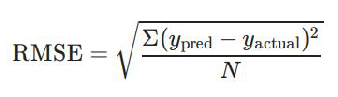

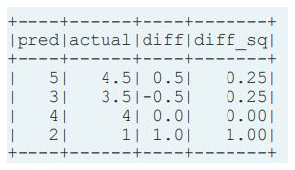

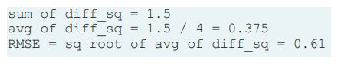

In [53]:
#vídeo

# Root Mean Squared Error
image = plt.imread(data_folder + "rmse.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplots_adjust(left=0, bottom=0, right=0.75, top=1, wspace=0, hspace=0)
plt.show()

# Predictions vs Actual. Difference. Difference squared
image = plt.imread(data_folder + "pred_vs_actual.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplots_adjust(left=0, bottom=0, right=0.65, top=1, wspace=0, hspace=0)
plt.show()

# Sum of Difference Squared. Average of Difference Squared. RMSE
image = plt.imread(data_folder + "sum_diff_avg_rmse.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplots_adjust(left=0, bottom=0, right=0.75, top=1, wspace=0, hspace=0)
plt.show()

In [54]:
%%script false

# Recommend for all users

# Generate n recommendations for all users
recommendForAllUsers(n) # n is an integer

# Unclean Recommendation Output
ALS_recommendations.show()

# Cleaning Up Recommendation Output
ALS_recommendations.registerTempTable("ALS_recs_temp")

clean_recs = spark.sql("""SELECT userId, 
                       movieIds_and_ratings.movieId AS movieId,
                       movieIds_and_ratings.rating AS prediction
                       FROM ALS_recs_temp
                       LATERAL VIEW explode(recommendations) exploded_table 
                       AS movieIds_and_ratings""")

# Explode Function
exploded_recs = spark.sql("SELECT userId, explode(recommendations) AS MovieRec FROM ALS_recs_temp")
exploded_recs.show()

# Explode and Lateral View Together

clean_recs.join(movie_info, ["movieId"], "left").show()

# Filtering Recommendations
clean_recs.join(movie_ratings, ["userId", "movieId"], "left").show()

clean_recs.join(movie_ratings, ["userId", "movieId"], "left").filter(movie_ratings.rating.isNull()).show()

Couldn't find program: 'false'


Exercício 13

In [55]:
%%script false
# Generate predictions and calculate RMSE

test_predictions = best_model.transform(test)

# View the predictions 
test_predictions.show()

# Calculate and print the RMSE of test_predictions
RMSE = evaluator.evaluate(test_predictions)
print(RMSE)

Couldn't find program: 'false'


    +------+-------+------+------------------+
    |userId|movieId|rating|        prediction|
    +------+-------+------+------------------+
    |   380|    463|   3.0| 4.093334993256898|
    |   460|    471|   5.0| 4.789751482535894|
    |   440|    471|   3.0| 2.440344619907418|
    |   306|    471|   3.0|3.3247629567900976|
    |    19|    471|   3.0| 3.067333162723295|
    |   299|    471|   4.5| 5.218491499885204|
    |   537|    471|   5.0|  5.69083471617962|
    |   241|    471|   4.0| 3.816546176254299|
    |    23|    471|   3.5| 2.539020466532909|
    |   195|    471|   3.0| 3.355342979133588|
    |   487|    471|   4.0| 3.105186392315445|
    |   242|    471|   5.0| 5.893115933597325|
    |    30|    471|   4.0| 4.017221049024606|
    |   516|   1088|   3.0|3.3911144131643005|
    |   111|   1088|   3.5| 4.504826156475481|
    |    57|   1088|   4.0| 3.024549429857915|
    |    54|   1088|   5.0| 5.235519746597422|
    |    19|   1088|   3.0|  3.70884171609874|
    |   387|   1088|   4.0| 4.070842875474657|
    |   514|   1088|   3.0| 2.313176685047038|
    +------+-------+------+------------------+
    only showing top 20 rows
    
    0.6332304339145925
    
Remember that the RMSE is a rather subjective metric. Would you say that the RMSE in this case is sufficient to make meaningful recommendations?

Exercício 14

In [56]:
# Interpreting the RMSE

# This model was able to achieve an RMSE of 0.633. Click on the best interpretation of what this means.

print("""An RMSE of 0.633 means that on average the model predicts 0.633 above or below values of the original ratings
matrix.""")

An RMSE of 0.633 means that on average the model predicts 0.633 above or below values of the original ratings
matrix.


Exercício 15

In [57]:
%%script false
# Do Recommendations Make Sense

# Now that we have an understanding of how well our model performed, and have some confidence that it will provide 
# recommendations that are relevant to users, let's actually look at recommendations made to a user and see if they make 
# sense.
# The original ratings data is provided here as original_ratings. Take a look at user 60 and user 63's original ratings,
# and compare them to what ALS recommended for them. In your opinion, are the recommendations consistent with their original
# preferences?


# Look at user 60's ratings
print("User 60's Ratings:")
original_ratings.filter(col("userId") == 60).sort("rating", ascending = False).show()

# Look at the movies recommended to user 60
print("User 60s Recommendations:")
recommendations.filter(col("userId") == 60).show()


# Look at user 63's ratings
print("User 63's Ratings:")
original_ratings.filter(col("userId") == 63).sort("rating", ascending = False).show()

# Look at the movies recommended to user 63
print("User 63's Recommendations:")
recommendations.filter(col("userId") == 63).show()


Couldn't find program: 'false'


    User 60's Ratings:
    +------+-------+------+--------------------+--------------------+
    |userId|movieId|rating|               title|              genres|
    +------+-------+------+--------------------+--------------------+
    |    60|    858|     5|  GodfatherThe(1972)|         Crime|Drama|
    |    60|    235|     5|        EdWood(1994)|        Comedy|Drama|
    |    60|   1732|     5|BigLebowskiThe(1998)|        Comedy|Crime|
    |    60|   2324|     5|LifeIsBeautiful(L...|Comedy|Drama|Roma...|
    |    60|   3949|     5|RequiemforaDream(...|               Drama|
    |    60|    541|     5|   BladeRunner(1982)|Action|Sci-Fi|Thr...|
    |    60|   5995|     5|    PianistThe(2002)|           Drama|War|
    |    60|   6350|     5|Laputa:Castleinth...|Action|Adventure|...|
    |    60|   7361|     5|EternalSunshineof...|Drama|Romance|Sci-Fi|
    |    60|   8638|     5|  BeforeSunset(2004)|       Drama|Romance|
    |    60|   8981|     5|        Closer(2004)|       Drama|Romance|
    |    60|  27803|     5|SeaInsideThe(Mara...|               Drama|
    |    60|  30749|     5|   HotelRwanda(2004)|           Drama|War|
    |    60|   5060|     5|M*A*S*H(a.k.a.MAS...|    Comedy|Drama|War|
    |    60|   1221|     5|Godfather:PartIIT...|         Crime|Drama|
    |    60|   5690|     5|GraveoftheFirefli...| Animation|Drama|War|
    |    60|   1653|     5|       Gattaca(1997)|Drama|Sci-Fi|Thri...|
    |    60|     16|   4.5|        Casino(1995)|         Crime|Drama|
    |    60|    111|   4.5|    TaxiDriver(1976)|Crime|Drama|Thriller|
    |    60|   1080|   4.5|MontyPython'sLife...|              Comedy|
    +------+-------+------+--------------------+--------------------+
    only showing top 20 rows
    
    User 60s Recommendations:
    +------+-------+----------+--------------------+--------------------+
    |userId|movieId|prediction|               title|              genres|
    +------+-------+----------+--------------------+--------------------+
    |    60|  83318|  5.810963|       GoatThe(1921)|              Comedy|
    |    60|  83411|  5.810963|          Cops(1922)|              Comedy|
    |    60|  73344|  5.315315|ProphetA(UnProphÃ...|         Crime|Drama|
    |    60|   3309| 5.2298656|    Dog'sLifeA(1918)|              Comedy|
    |    60|   8609| 5.2298656|OurHospitality(1923)|              Comedy|
    |    60|  72647| 5.2298656|   Zorn'sLemma(1970)|               Drama|
    |    60|   5059| 5.2298656|LittleDieterNeeds...|         Documentary|
    |    60|   8797| 5.2298656|      Salesman(1969)|         Documentary|
    |    60|  25764| 5.2298656|  CameramanThe(1928)|Comedy|Drama|Romance|
    |    60|   7074| 5.2298656|  NavigatorThe(1924)|              Comedy|
    |    60|  31547| 5.2298656|LessonsofDarkness...|     Documentary|War|
    |    60|   4405| 5.2298656|LastLaughThe(Letz...|               Drama|
    |    60|  26400| 5.2298656| GatesofHeaven(1978)|         Documentary|
    |    60|  80599| 5.2298656|BusterKeaton:AHar...|         Documentary|
    |    60|  92494| 5.1418443|DylanMoran:Monste...|  Comedy|Documentary|
    |    60|   3216| 5.1418443|VampyrosLesbos(Va...|Fantasy|Horror|Th...|
    |    60|   6918| 5.1184077|UnvanquishedThe(A...|               Drama|
    |    60|  40412| 5.0673676|DeadMan'sShoes(2004)|      Crime|Thriller|
    |    60|  52767|  5.043912|          21Up(1977)|         Documentary|
    |    60|   8955| 5.0317564|      Undertow(2004)|Crime|Drama|Thriller|
    +------+-------+----------+--------------------+--------------------+
    
    User 63's Ratings:
    +------+-------+------+--------------------+--------------------+
    |userId|movieId|rating|               title|              genres|
    +------+-------+------+--------------------+--------------------+
    |    63|      1|     5|      ToyStory(1995)|Adventure|Animati...|
    |    63|     16|     5|        Casino(1995)|         Crime|Drama|
    |    63|    260|     5|StarWars:EpisodeI...|Action|Adventure|...|
    |    63|    318|     5|ShawshankRedempti...|         Crime|Drama|
    |    63|    592|     5|        Batman(1989)|Action|Crime|Thri...|
    |    63|   1193|     5|OneFlewOvertheCuc...|               Drama|
    |    63|   1198|     5|RaidersoftheLostA...|    Action|Adventure|
    |    63|   1214|     5|         Alien(1979)|       Horror|Sci-Fi|
    |    63|   1221|     5|Godfather:PartIIT...|         Crime|Drama|
    |    63|   1259|     5|     StandbyMe(1986)|     Adventure|Drama|
    |    63|   1356|     5|StarTrek:FirstCon...|Action|Adventure|...|
    |    63|   1639|     5|    ChasingAmy(1997)|Comedy|Drama|Romance|
    |    63|   2797|     5|           Big(1988)|Comedy|Drama|Fant...|
    |    63|   2858|     5|AmericanBeauty(1999)|       Drama|Romance|
    |    63|   2918|     5|FerrisBueller'sDa...|              Comedy|
    |    63|   3114|     5|     ToyStory2(1999)|Adventure|Animati...|
    |    63|   3176|     5|TalentedMr.Ripley...|Drama|Mystery|Thr...|
    |    63|   3481|     5|  HighFidelity(2000)|Comedy|Drama|Romance|
    |    63|   3578|     5|     Gladiator(2000)|Action|Adventure|...|
    |    63|   4306|     5|         Shrek(2001)|Adventure|Animati...|
    +------+-------+------+--------------------+--------------------+
    only showing top 20 rows
    
    User 63's Recommendations:
    +------+-------+----------+--------------------+--------------------+
    |userId|movieId|prediction|               title|              genres|
    +------+-------+----------+--------------------+--------------------+
    |    63|  92210| 4.8674645|DisappearanceofHa...|Adventure|Animati...|
    |    63| 110873| 4.8674645|CentenarianWhoCli...|Adventure|Comedy|...|
    |    63|   9010| 4.8588977|LoveMeIfYouDare(J...|       Drama|Romance|
    |    63| 108583|  4.836118|FawltyTowers(1975...|              Comedy|
    |    63|   8530| 4.8189244|   DearFrankie(2004)|       Drama|Romance|
    |    63|  83318|  4.813581|       GoatThe(1921)|              Comedy|
    |    63|  83411|  4.813581|          Cops(1922)|              Comedy|
    |    63|  65037| 4.7906556|          BenX(2007)|               Drama|
    |    63|  54328|  4.688013|MyBestFriend(Monm...|              Comedy|
    |    63|   3437|  4.678849|     CoolasIce(1991)|               Drama|
    |    63|   2924|  4.675808|DrunkenMaster(Jui...|       Action|Comedy|
    |    63|   1196| 4.6633716|StarWars:EpisodeV...|Action|Adventure|...|
    |    63|  27156| 4.6382804|NeonGenesisEvange...|Action|Animation|...|
    |    63|  26865| 4.6308517|FistofLegend(Jing...|        Action|Drama|
    |    63|   5244| 4.6302986|ShogunAssassin(1980)|    Action|Adventure|
    |    63|  93320| 4.6302986|TrailerParkBoys(1...|        Comedy|Crime|
    |    63|  50641| 4.6302986|  House(Hausu)(1977)|Comedy|Fantasy|Ho...|
    |    63|   6598|  4.624031|StepIntoLiquid(2002)|         Documentary|
    |    63|   7502| 4.6232696|BandofBrothers(2001)|    Action|Drama|War|
    |    63|  73344|  4.609774|ProphetA(UnProphÃ...|         Crime|Drama|
    +------+-------+----------+--------------------+--------------------+

# Chapter 4 - What if you don't have customer ratings?

#### Exercício 1 - Introduction to the MillionSongs dataset

In [58]:
# example song ratings dataset

from pyspark.sql import *
from pyspark.sql.types import *

columns = Row("userId", "songId", "num_plays")
row1 = columns(10, 22, 5)
row2 = columns(38, 99, 1)
row3 = columns(38, 77, 3)
row4 = columns(42, 99, 1)

schema = StructType([StructField("userId", IntegerType(), True),
                     StructField("songId", IntegerType(), True),
                     StructField("num_plays", IntegerType(), True)])

ratings = spark.createDataFrame([row1, row2, row3, row4], schema)
ratings.show()

print(ratings.printSchema)

+------+------+---------+
|userId|songId|num_plays|
+------+------+---------+
|    10|    22|        5|
|    38|    99|        1|
|    38|    77|        3|
|    42|    99|        1|
+------+------+---------+

<bound method DataFrame.printSchema of DataFrame[userId: int, songId: int, num_plays: int]>


In [59]:
#vídeo

# Explicit vs Implicit ratings

# THE ECHO NEST TASTE PROFILE DATASET

# Add Zeros Sample
ratings.show()

# Cross Join Intro
users = ratings.select("userId").distinct()
users.show()

songs = ratings.select("songId").distinct()
songs.show()

# Cross Join Output
cross_join = users.crossJoin(songs)
cross_join.show()

# Joining Back Original Ratings Data  &  Filling In With Zero
cross_join = users.crossJoin(songs).join(ratings, ["userId", "songId"], "left").fillna(0)
cross_join.show()

# Add Zeros Function
def add_zeros(df):
    # Extracts distinct users
    users = df.select("userId").distinct()
    
    # Extracts distinct songs
    songs = df.select("songId").distinct()
    
    # Joins users and songs, fills blanks with 0
    cross_join = users.crossJoin(items).join(df, ["userId", "songId"], "left").fillna(0)
    return cross_join


+------+------+---------+
|userId|songId|num_plays|
+------+------+---------+
|    10|    22|        5|
|    38|    99|        1|
|    38|    77|        3|
|    42|    99|        1|
+------+------+---------+

+------+
|userId|
+------+
|    10|
|    38|
|    42|
+------+

+------+
|songId|
+------+
|    22|
|    77|
|    99|
+------+

+------+------+
|userId|songId|
+------+------+
|    10|    22|
|    10|    77|
|    10|    99|
|    38|    22|
|    38|    77|
|    38|    99|
|    42|    22|
|    42|    77|
|    42|    99|
+------+------+

+------+------+---------+
|userId|songId|num_plays|
+------+------+---------+
|    38|    77|        3|
|    42|    99|        1|
|    10|    99|        0|
|    38|    99|        1|
|    42|    22|        0|
|    10|    77|        0|
|    38|    22|        0|
|    10|    22|        5|
|    42|    77|        0|
+------+------+---------+



Exercício 2

In [60]:
# What is the difference between "implicit" ratings and "explicit" ratings?

# Explicit ratings are values that users have given to explicitly rate their preferences. Implicit ratings are "implied"
# from user behavior.

Exercício 3

In [61]:
%%script false
# MSD summary statistics

# Let's get familiar with the Million Songs Echo Nest Taste Profile data subset. 
# For purposes of this course, we'll just call it the Million Songs dataset or msd. 
# Let's get the number of users and the number of songs. Let's also see which songs have the most plays from this subset.

# Look at the data
msd.show()

# Count the number of distinct userIds
user_count = msd.select("userId").distinct().count()
print("Number of users: ", user_count)

# Count the number of distinct songIds
song_count = msd.select("songId").distinct().count()
print("Number of songs: ", song_count)


Couldn't find program: 'false'


    +------+------+---------+
    |userId|songId|num_plays|
    +------+------+---------+
    |   148|   148|        0|
    |   243|   496|        0|
    |    31|   471|        0|
    |   137|   463|        0|
    |   251|   623|        0|
    |    85|   392|        0|
    |    65|   540|        0|
    |   255|   243|        0|
    |    53|   516|        0|
    |   133|    31|        0|
    |   296|    85|        0|
    |    78|   451|        0|
    |   108|   580|        0|
    |   155|   137|        0|
    |   193|   251|        0|
    |   211|    65|        0|
    |    34|   458|        0|
    |   115|    53|        0|
    |   126|   255|        0|
    |   101|   588|        0|
    +------+------+---------+
    only showing top 20 rows
    
    Number of users:  321
    Number of songs:  729

Exercício 4

In [62]:
from pyspark.sql.functions import col, min, max

In [63]:
%%script false
# Grouped summary statistics

# Min num implicit ratings for a song
print("Minimum implicit ratings for a song: ")
msd.filter(col("num_plays") > 0).groupBy("songId").count().select(min("count")).show()

# Avg num implicit ratings per songs
print("Average implicit ratings per song: ")
msd.filter(col("num_plays") > 0).groupBy("songId").count().select(avg("count")).show()

# Min num implicit ratings from a user
print("Minimum implicit ratings from a user: ")
msd.filter(col("num_plays") > 0).groupBy("userId").count().select(min("count")).show()

# Avg num implicit ratings for users
print("Average implicit ratings per user: ")
msd.filter(col("num_plays") > 0).groupBy("userId").count().select(avg("count")).show()


Couldn't find program: 'false'


    Minimum implicit ratings for a song: 
    +----------+
    |min(count)|
    +----------+
    |         3|
    +----------+
    
    Average implicit ratings per song: 
    +------------------+
    |        avg(count)|
    +------------------+
    |35.251063829787235|
    +------------------+
    
    Minimum implicit ratings from a user: 
    +----------+
    |min(count)|
    +----------+
    |        21|
    +----------+
    
    Average implicit ratings per user: 
    +-----------------+
    |       avg(count)|
    +-----------------+
    |77.42056074766356|
    +-----------------+

Exercício 5

In [64]:
%%script false
# Add Zeros

# Many recommendation engines use implicit ratings. In many cases these datasets don't include behavior counts for items
# that a user has never purchased. In these cases, you'll need to add them and include zeros. The dataframe Z is provided 
# for you. It contains userId's, productId's and num_purchases which is the number of times a user has purchased a specific 
# product.

# View the data
print("Z")
Z.show()

# Extract distinct userIds and productIds
users = Z.select("userId").distinct()
products = Z.select("productId").distinct()

print("users")
users.show()
print("products")
products.show()

# Cross join users and products
cj = users.crossJoin(products)

# Join cj and Z
Z_expanded = cj.join(Z, ["userId", "productId"], "left").fillna(0)

# View Z_expanded
print("Z_expanded")
Z_expanded.show()

Couldn't find program: 'false'


    Z
    +------+---------+-------------+
    |userId|productId|num_purchases|
    +------+---------+-------------+
    |  2112|      777|            1|
    |     7|       44|           23|
    |  1132|      227|            9|
    |   686|     1981|            2|
    |    42|     2390|            5|
    |    13|     1662|           21|
    |  2112|     1492|            8|
    |    22|     1811|           96|
    +------+---------+-------------+
    
    users
    +------+
    |userId|
    +------+
    |    22|
    |   686|
    |    13|
    |  1132|
    |     7|
    |  2112|
    |    42|
    +------+
    
    products
    +---------+
    |productId|
    +---------+
    |       44|
    |      777|
    |     1811|
    |      227|
    |     1662|
    |     1492|
    |     2390|
    |     1981|
    +---------+
    
    Z_expanded
    +------+---------+-------------+
    |userId|productId|num_purchases|
    +------+---------+-------------+
    |    22|       44|            0|
    |    22|      777|            0|
    |    22|     1811|           96|
    |    22|      227|            0|
    |    22|     1662|            0|
    |    22|     1492|            0|
    |    22|     2390|            0|
    |    22|     1981|            0|
    |   686|       44|            0|
    |   686|      777|            0|
    |   686|     1811|            0|
    |   686|      227|            0|
    |   686|     1662|            0|
    |   686|     1492|            0|
    |   686|     2390|            0|
    |   686|     1981|            2|
    |    13|       44|            0|
    |    13|      777|            0|
    |    13|     1811|            0|
    |    13|      227|            0|
    +------+---------+-------------+
    only showing top 20 rows


#### Exercício 6 - Evaluating Implicit Rating Models

Implicit Ratings models have an additional hyperparameter: alpha. This is an integer value that tells Spark 
how much each additional songplay should add to the models confidence that an user actually likes a song.
Like the other hyperparameters, this will need to be tuned via cross validation.

The challenge of these models is the evaluation:


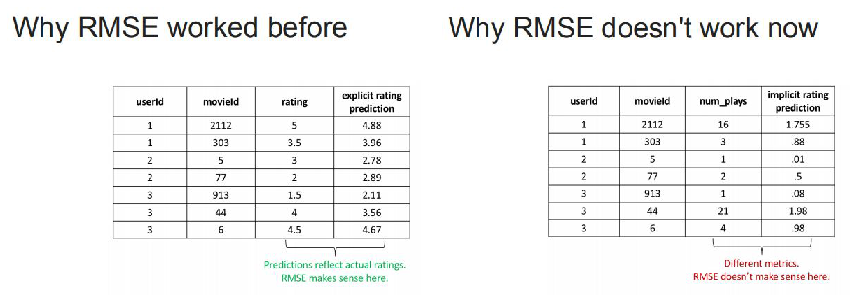

RMSE doesn't work now with implicit ratings since there are different metrics.


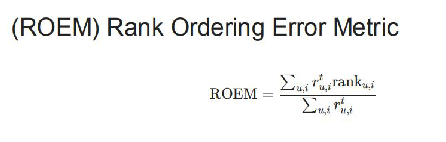

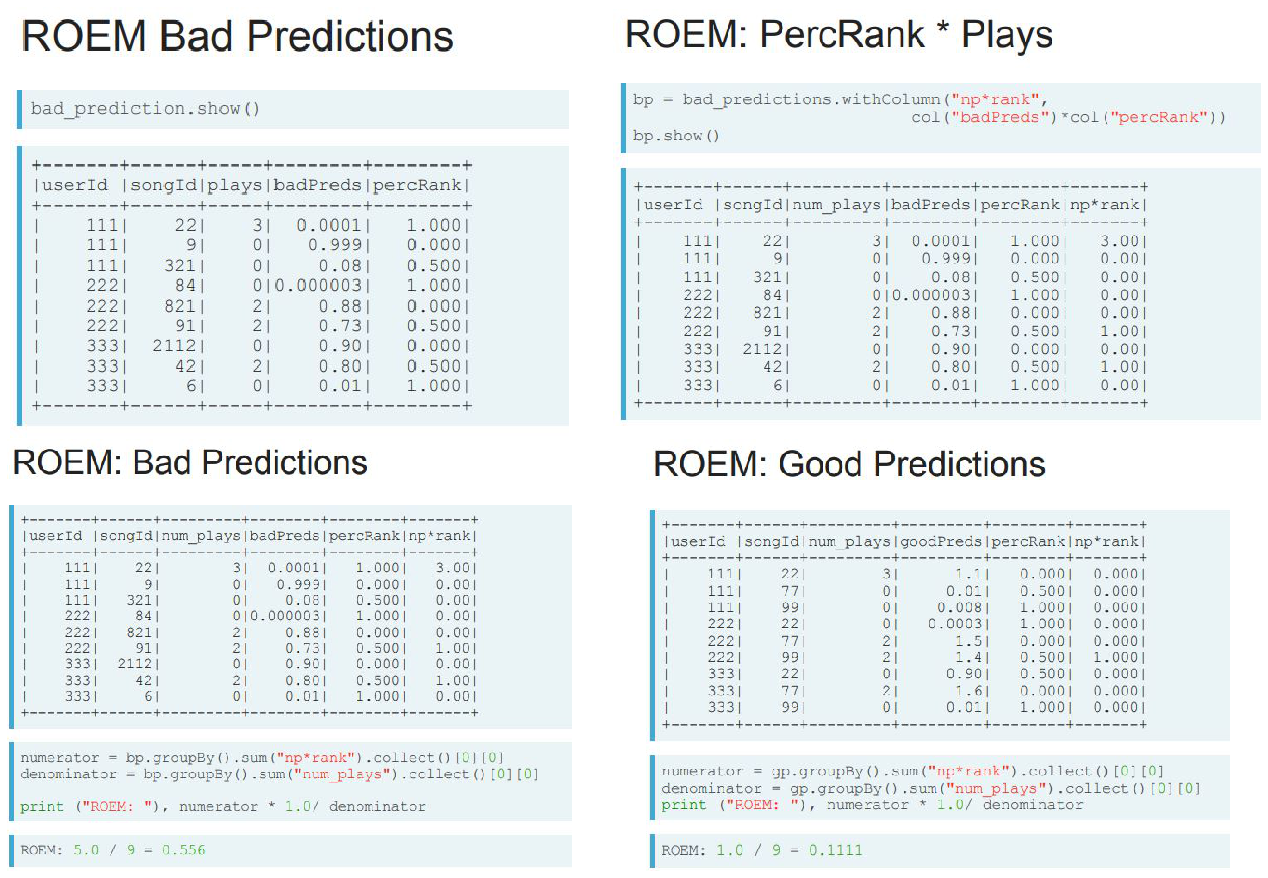

In [65]:
#vídeo

print("""Implicit Ratings models have an additional hyperparameter: alpha. This is an integer value that tells Spark 
how much each additional songplay should add to the models confidence that an user actually likes a song.
Like the other hyperparameters, this will need to be tuned via cross validation.

The challenge of these models is the evaluation:""")

# Why RMSE worked before
plt.subplot(1, 2, 1)
image = plt.imread(data_folder + "why_rmse.jpg")
plt.axis('off')
plt.imshow(image)

# Why RMSE doesn't work now
plt.subplot(1, 2, 2)
image = plt.imread(data_folder + "why_rmse_not_implicit.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplots_adjust(left=0, bottom=0, right=2, top=1, wspace=0, hspace=0)
plt.show()

print("RMSE doesn't work now with implicit ratings since there are different metrics.")


####################################

# (ROEM) Rank Ordering Error Metric
image = plt.imread(data_folder + "ROEM.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplots_adjust(left=0, bottom=-0.5, right=1, top=1, wspace=0, hspace=0)
plt.show()


# Bad predictions
plt.subplot(2, 2, 1)
image = plt.imread(data_folder + "roem_bad.jpg")
plt.axis('off')
plt.imshow(image)

# ROEM: PercRank * Plays
plt.subplot(2, 2, 2)
image = plt.imread(data_folder + "roem_percrank.jpg")
plt.axis('off')
plt.imshow(image)

# ROEM: Bad Predictions
plt.subplot(2, 2, 3)
image = plt.imread(data_folder + "roem_bad_2.jpg")
plt.axis('off')
plt.imshow(image)

# Good Predictions
plt.subplot(2, 2, 4)
image = plt.imread(data_folder + "roem_good.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplots_adjust(left=0, bottom=-2, right=3, top=1, wspace=0, hspace=0)
plt.show()

In [66]:
%%script false

# Spark doesn't have a function like this -- we need to implement it manually

# Building Several ROEM Models

(train, test) = implicit_ratings.randomSplit([.8, .2])

# Empty list to be filled with models
model_list = []

# Complete each of the hyperparameter value lists
ranks = [10, 20, 30, 40]
maxIters = [10, 20, 30, 40]
regParams = [.05, .1, .15]
alphas = [20, 40, 60, 80]

# For loop will automatically create and store ALS models
for r in ranks:
    for mi in maxIters:
        for rp in regParams:
            for a in alphas:
                model_list.append(ALS(userCol= "userId", itemCol= "songId", ratingCol= "num_plays", 
                                      rank = r, maxIter = mi, regParam = rp, alpha = a, 
                                      coldStartStrategy="drop", nonnegative = True, implicitPrefs = True))


# Error Output
for model in model_list:
    # Fits each model to the training data
    trained_model = model.fit(train)
    
    # Generates test predictions
    predictions = trained_model.transform(test)
    
    # Evaluates each model's performance
    ROEM(predictions)
    

Couldn't find program: 'false'


Exercício 7

In [67]:
# Specify ALS Hyperparameters

ranks = [10, 20, 30, 40]
maxIters = [10, 20, 30, 40]
regParams = [.05, .1, .15]
alphas = [20, 40, 60, 80]


Exercício 8

In [68]:
%%script false
# Build Implicit Models

# For loop will automatically create and store ALS models
for r in ranks:
    for mi in maxIters:
        for rp in regParams:
            for a in alphas:
                model_list.append(ALS(userCol= "userId", itemCol= "songId", ratingCol= "num_plays", 
                                      rank = r, maxIter = mi, regParam = rp, alpha = a, 
                                      coldStartStrategy="drop", nonnegative = True, implicitPrefs = True))

# Print the model list, and the length of model_list
print ("model_list:\n", model_list, "Length of model_list: ", len(model_list))

# Validate
len(model_list) == (len(ranks)*len(maxIters)*len(regParams)*len(alphas))


Couldn't find program: 'false'


model_list:

    [ALS_48bb8d2386dbea597cc4, ALS_46a19394ad944410df95, ALS_40c596002b69e5a9ba4d, ALS_493a8c7c7b91c86157f4, ALS_4fa284dd014d170e5119, ALS_4fff92b9083b2bea3260, ALS_470d89da1c7f80e6e12f, ALS_475eae6809b4570a0327, ALS_411e87e41de360929899, ALS_4292b2e5eb6141031009, ALS_41148f6ff41086fc893f, ALS_4e1693f06f8da035d229, ALS_41d5bdcbcd0d912a8630, ALS_4b1db5bd5576cbddbc95, ALS_4432ab7a1aa097415160, ALS_4fe39f0f87ab83a5ded5, ALS_407395680d0d4e831453, ALS_46c9b11757c5062694f0, ALS_4f189e850c15951cebbd, ALS_4b37bd52d1e670b7e786, ALS_4623a21cb1c19a378af5, ALS_40c5ae58eb8660beb7a8, ALS_41488103ae26bec49c3c, ALS_446fba356a1a68d2af4d, ALS_45aa84c67a81de937902, ALS_443f9ca791928c6844fc, ALS_4f22b4a9750a40091fcd, ALS_436b83a93cd8dc66c412, ALS_485f9e99b69edba2ca45, ALS_42bbbd106ab2e29d6347, ALS_4f68a7681203f47bdadd, ALS_4295acd28c169e425ff5, ALS_4a9188433d0bed305116, ALS_49d0ad653a00a70a0917, ALS_4ed79d6a6d7b00e05243, ALS_43fe9873ea3b15d21547, ALS_4bfb99cc4566a4ee83fd, ALS_4f8bacf33a7ece9a9d68, ALS_4c7387130fec5b820e89, ALS_436d85f7386d2a623072, ALS_4f61ba49a34cc187c454, ALS_4d9b810651b00f681295, ALS_4c82a71f6a8399641dc3, ALS_4e95886f0378edd4e7a6, ALS_4d49a7361acd859f53a0, ALS_47d48b1b8b09840a3d0a, ALS_4ccd9c4013651035e153, ALS_415ca6b01bd79f012cdf, ALS_42caa050be2866acb931, ALS_4c679a11e8f04750cbbc, ALS_4035a69a8e73d498c322, ALS_4714b8d09ea04aea6237, ALS_44d28642c8960769e329, ALS_45e8b12cb4902d66c53e, ALS_46a5ba9a6f148185a9f8, ALS_498eb84784a0e62274b4, ALS_462f8f9ded29c68cdab4, ALS_4ff2bee4d17613049a95, ALS_4640b76471ddc2c7099b, ALS_4225a688f2a3bdd5236e, ALS_47c88ba8f2e9419507fc, ALS_45459cbf7ffbafb59783, ALS_4d7c9d7984c553c493dd, ALS_416ab36a5ed9840217ea, ALS_41fcb9f842fac76bbdf8, ALS_4f089af21772facadc93, ALS_4f488b31f0e5cefdacda, ALS_415e9214e7e6eb0e9eb0, ALS_458dbfdb1d26ab683cd7, ALS_4f1db9f472d9568a950f, ALS_4b81b5a66e64ed980e73, ALS_462ebb5fe1c06424eac4, ALS_4923a2c2c9efd140d825, ALS_4bf3b5279b23541e171c, ALS_4575a2908728dd0a44f1, ALS_4f13b158c99c1f3c5bed, ALS_47eebf7d2c92fb825789, ALS_4f7ca7f1546ddc787686, ALS_4c79a064ce7dfbe1af86, ALS_43dfa53ca39a3174bd26, ALS_4ac6aab52e4b65acb89a, ALS_4b01869ba40d5b44220f, ALS_46c5b598e379167f160c, ALS_4736a3b279fcd0930507, ALS_4176816afaf5065b9417, ALS_40e4b4ada718cd3efd51, ALS_4660a4637cf41f2976ef, ALS_4d6898d08ef1a7da757b, ALS_4f139088c793ce1f1af3, ALS_46b6ae75d378fa376552, ALS_45d9a33bb6a495453c04, ALS_41d2b03ff4446bcb776e, ALS_4d9295379f7ff57cf428, ALS_4c75a58d956deb996825, ALS_42b294c3610ca857ce5e, ALS_46ada5480330c2556f71, ALS_4a2bba8f544f04efbbd3, ALS_499ea1ec0bf2fc852e42, ALS_40e3ae25373d72682b7b, ALS_4ecda6e35f0c1faa81b1, ALS_462fb456faef16283302, ALS_4dd28035a60297b9845f, ALS_4bc49df9a7d35a0a1f71, ALS_4105957d6607301e9f57, ALS_4e02a55e07b8e620a9cf, ALS_4f5fa1ad2cff7f23e3a4, ALS_4956a472cfcec4c2ee3f, ALS_4a0e9c405dcc76a63c5f, ALS_41fba3c803a17d23e9bf, ALS_431fa22fb0accd3a6c29, ALS_4b8fa443cc62b6fa893a, ALS_457da5ed37dcb524e5a7, ALS_49378bfc348337b0a0a6, ALS_4f4487da25ab0206b9d3, ALS_4572b994d22089bb8d47, ALS_48edaa81faa5cf875798, ALS_4b20a3f48383bd48085a, ALS_427f954066a04d08dddc, ALS_4406a17f1a54ccca536b, ALS_4955bbffa287a1011068, ALS_427fbd7c5467952d0e8a, ALS_4637aef7e5b787673015, ALS_4fe5a26f264e86ff860f, ALS_45bdb81db37db20aa4c5, ALS_49ab96858de443679318, ALS_4a92bb93554c58f3a758, ALS_4470806b7a2c36e21c35, ALS_41eb82376e630babc5fe, ALS_48ca96c9d3fe0092cc13, ALS_4e54953ba61afc922e76, ALS_47bd9ba1b5cbd7ff542f, ALS_4362bc3eb9ed44ea69c8, ALS_471e9865fabb38e6f6f8, ALS_406d8a0b0e09fed1152c, ALS_46359ae22a513cbc8755, ALS_4ea788787d22e791324c, ALS_4265956f72e35fb40692, ALS_4dd49c19fdb0ee4eb151, ALS_41de954710be1a648128, ALS_4b51bd72d426ba1f264a, ALS_4c0db7a2740380c511a2, ALS_4e3ba1f2324cc8c57da0, ALS_46c2a228001c44515e0c, ALS_49049aad416f7a78db61, ALS_442580ba4289edd7f29f, ALS_40278c5081a17b2067a5, ALS_441ba0e41bcd1aa81761, ALS_43cc8a6c85df29b4d92d, ALS_4938bc9c7c6a9d9c8193, ALS_4c2ab51e791cd59e7c03, ALS_4ded9b12ecb8026784c7, ALS_4be5811e67f7a2dd536e, ALS_4c8fb43f34b9ec49f044, ALS_499b8442425f6626bc53, ALS_44ac8badaed2687b422b, ALS_4ec58eede9568a2b472c, ALS_4e378f4609e8ef025012, ALS_45eaba54953b9d939884, ALS_4bd5ad9c2f147cda91bb, ALS_427786d315e5564cae04, ALS_46da973b600c920dfa3c, ALS_4b13b47a3e779ed7947a, ALS_41aa8c445ec9e42f65c5, ALS_4d9ab39f696d9100be25, ALS_4ac1b4d030830d430115, ALS_4a448d3b4cf794819857, ALS_4bc7994cb0ac9d030535, ALS_40c9a04ca11faeaacdae, ALS_4244ac19863ee90ba438, ALS_44bda528b86bbfd4d877, ALS_492497fcbaea426c4f72, ALS_4dc4abaca0a6d6e913e9, ALS_46fc949b2db996f298ed, ALS_45a3849c950ac716f1f2, ALS_4402a33f38c1b0fdafee, ALS_4106abd48a37c69fb523, ALS_4a2aa1a20035a0136e79, ALS_42f8b2493f59de6abf07, ALS_407a90a8f7881fcc7d2b, ALS_46949b68dcee610ca141, ALS_4bd09dfe5e217dd9a12b, ALS_493c8481d2dec651cf36, ALS_4f27b21db1c23a44687b, ALS_478d9abaab5a8b9d3f5b, ALS_43b3b91e75ed19a954b8, ALS_4ee6acb42144a8d487e3, ALS_4853a2a5c8b203707a13, ALS_49a8baafa8d941ea43db, ALS_4a4cbe50aa3bd18ec11e, ALS_4c80869141a42a878f28, ALS_4f0299c27755cf98e7bb, ALS_453fab1505dca087a9e8] 
    
Length of model_list:  192

In [69]:
# You've built your first 192 implicit rating models. Now let's see how they performed.

Exercício 9

### Running a Cross-Validated Implicit ALS Model

Now that we have several ALS models, each with a different set of hyperparameter values, we can train them on a training portion of the msd dataset using cross validation, and then run them on a test set of data and evaluate how well each one performs using the ROEM function discussed earlier. Unfortunately, this takes too much time for this exercise, so it has been done separately. But for your reference you can evaluate your model_list using the following loop (we are using the msd dataset in this case):

In [70]:
%%script false
### Split the data into training and test sets
(training, test) = msd.randomSplit([0.8, 0.2])


### Building 5 folds within the training set.
train1, train2, train3, train4, train5 = training.randomSplit([0.2, 0.2, 0.2, 0.2, 0.2], seed = 1)

fold1 = train2.union(train3).union(train4).union(train5)
fold2 = train3.union(train4).union(train5).union(train1)
fold3 = train4.union(train5).union(train1).union(train2)
fold4 = train5.union(train1).union(train2).union(train3)
fold5 = train1.union(train2).union(train3).union(train4)

foldlist = [(fold1, train1), (fold2, train2), (fold3, train3), (fold4, train4), (fold5, train5)]

### Empty list to fill with ROEMs from each model
ROEMS = []

### Loops through all models and all folds
for model in model_list:
    for ft_pair in foldlist:

        # Fits model to fold within training data
        fitted_model = model.fit(ft_pair[0])

        # Generates predictions using fitted_model on respective CV test data
        predictions = fitted_model.transform(ft_pair[1])

        # Generates and prints a ROEM metric CV test data
        r = ROEM(predictions)
        print ("ROEM: ", r)

    # Fits model to all of training data and generates preds for test data
    v_fitted_model = model.fit(training)
    v_predictions = v_fitted_model.transform(test)
    v_ROEM = ROEM(v_predictions)

    # Adds validation ROEM to ROEM list
    ROEMS.append(v_ROEM)
    print ("Validation ROEM: ", v_ROEM)

Couldn't find program: 'false'


For purposes of walking you through the steps, the test predictions for 192 models have already been generated, and their ROEM has been calculated. They are found in the ROEMS list provided. Because a list isn't unique to Pyspark, and because numpy works really well with lists, we're going to use numpy here. Follow the instructions below to find the best ROEM and the model that provided it.

In [71]:
%%script false

# Import numpy
import numpy as np

# Find the index of the smallest ROEM
i = np.argmin(ROEMS)
print("Index of smallest ROEM:", i)

# Find ith element of ROEMS
print("Smallest ROEM: ", ROEMS[i])


Couldn't find program: 'false'


    Index of smallest ROEM: 38
    Smallest ROEM:  0.01980198019801982

Exercício 10

In [72]:
%%script false
# Extracting Parameters

# You've now tested 192 different models on the msd dataset, and you found the best ROEM and its respective model 
# (model 38).

# You now need to extract the hyperparameters. The model_list you created previously is provided here. It contains all 
# 192 models you generated. Use the instructions below to extract the hyperparameters.

# Extract the best_model
best_model = model_list[38]

# Extract the Rank
print ("Rank: ", best_model.getRank())

# Extract the MaxIter value
print ("MaxIter: ", best_model.getMaxIter())

# Extract the RegParam value
print ("RegParam: ", best_model.getRegParam())

# Extract the Alpha value
print ("Alpha: ", best_model.getAlpha())


Couldn't find program: 'false'


    Rank:  10
    MaxIter:  40
    RegParam:  0.05
    Alpha:  60.0

#### Exercício 11 - Overview of binary, implicit ratings

In [73]:
%%script false
#vídeo

# Binary ratings (1's e 0's)
binary_movie_ratings.show()

# Class imbalance
getSparsity(binary_ratings)


# Item Weighting & User weighting
#  - Item Weighting: Movies with more user views = higher weight
#  - User Weighting: Users that have seen more movies will have lower weights applied to unseen movies


Couldn't find program: 'false'


Exercício 12

In [74]:
%%script false

# Binary Model Performance

# You've already built several ALS models, so we won't do that again. An implicit ALS model has already been fitted to the 
# binary ratings of the MovieLens dataset. Let's look at the binary_test_predictions from this model to see what we can 
# learn. The ROEM() function has been defined for you. 

# Import the col function
from pyspark.sql.functions import col

# Look at the test predictions
binary_test_predictions.show()

# Evaluate ROEM on test predictions
ROEM(binary_test_predictions)

# Look at user 42's test predictions
binary_test_predictions.filter(col("userId") == 42).show()

Couldn't find program: 'false'


    +------+-------+------+-----------+
    |userId|movieId|viewed| prediction|
    +------+-------+------+-----------+
    |    91|    148|     0|        0.0|
    |   601|    148|     0|        0.0|
    |   545|    148|     0|0.060729448|
    |   505|    148|     0|  0.2972868|
    |   526|    148|     0|        0.0|
    |   478|    148|     0|        0.0|
    |   106|    148|     0|        0.0|
    |   135|    148|     0|        0.0|
    |    78|    463|     0|0.050237626|
    |   259|    463|     0|0.027345931|
    |   127|    463|     0|0.016793307|
    |   502|    463|     0|0.019936942|
    |   441|    463|     0|0.002274946|
    |   664|    463|     0| 0.15109323|
    |   418|    463|     0|0.011756073|
    |   390|    463|     0|  0.3210355|
    |    32|    463|     0|0.018041197|
    |    58|    463|     0| 0.24846576|
    |   311|    463|     1|  1.0126673|
    |   471|    471|     0|  0.7693843|
    +------+-------+------+-----------+
    only showing top 20 rows
    
    ROEM: 0.07436376290899886
    +------+-------+------+-----------+
    |userId|movieId|viewed| prediction|
    +------+-------+------+-----------+
    |    42|    858|     0|  0.9915983|
    |    42|   3703|     0|  0.5134803|
    |    42|   2606|     0|        0.0|
    |    42|   6213|     0|0.008813023|
    |    42|   2342|     0|        0.0|
    |    42|  58107|     0|0.033887785|
    |    42|   6953|     0| 0.29286233|
    |    42|  41716|     0|        0.0|
    |    42|  49394|     0|0.021620607|
    |    42|   6509|     0|        0.0|
    |    42|   3512|     0|        0.0|
    |    42|   6810|     0|        0.0|
    |    42|  30749|     0| 0.60764235|
    |    42|  74282|     0|0.042640854|
    |    42|   2255|     0|        0.0|
    |    42|   3891|     0|        0.0|
    |    42|  31116|     0|        0.0|
    |    42|   2013|     0|  0.4043246|
    |    42|   3390|     0|        0.0|
    |    42|   1488|     0|        0.0|
    +------+-------+------+-----------+
    only showing top 20 rows

Exercício 13

In [75]:
%%script false
# Recommendations From Binary Data

# View user 26's original ratings
print ("User 26 Original Ratings:")
original_ratings.filter(col("userId") == 26).show()

# View user 26's recommendations
print ("User 26 Recommendations:")
binary_recs.filter(col("userId") == 26).show()

# View user 99's original ratings
print ("User 99 Original Ratings:")
original_ratings.filter(col("userId") == 99).show()

# View user 99's recommendations
print ("User 99 Recommendations:")
binary_recs.filter(col("userId") == 99).show()

Couldn't find program: 'false'


    User 26 Original Ratings:
    +------+-------+------+--------------------+--------------------+
    |userId|movieId|rating|               title|              genres|
    +------+-------+------+--------------------+--------------------+
    |    26|      1|     5|      ToyStory(1995)|Adventure|Animati...|
    |    26|   2542|     5|LockStock&TwoSmok...|Comedy|Crime|Thri...|
    |    26|   2571|     5|     MatrixThe(1999)|Action|Sci-Fi|Thr...|
    |    26|   4011|     5|        Snatch(2000)|Comedy|Crime|Thri...|
    |    26|   6016|     5|CityofGod(Cidaded...|Action|Adventure|...|
    |    26|   8798|     5|    Collateral(2004)|Action|Crime|Dram...|
    |    26|  27831|     5|     LayerCake(2004)|Crime|Drama|Thriller|
    |    26|  44191|     5|  VforVendetta(2006)|Action|Sci-Fi|Thr...|
    |    26|  44195|     5|ThankYouforSmokin...|        Comedy|Drama|
    |    26|  50872|     5|   Ratatouille(2007)|Animation|Childre...|
    |    26|  54286|     5|BourneUltimatumTh...|Action|Crime|Thri...|
    |    26|  58559|     5| DarkKnightThe(2008)|Action|Crime|Dram...|
    |    26|  59369|     5|         Taken(2008)|Action|Crime|Dram...|
    |    26|  59784|     5|   KungFuPanda(2008)|Action|Animation|...|
    |    26|  60684|     5|      Watchmen(2009)|Action|Drama|Myst...|
    |    26|  65514|     5|         IpMan(2008)|    Action|Drama|War|
    |    26|     32|     4|TwelveMonkeys(a.k...|Mystery|Sci-Fi|Th...|
    |    26|     47|     4|Seven(a.k.a.Se7en...|    Mystery|Thriller|
    |    26|     50|     4|UsualSuspectsThe(...|Crime|Mystery|Thr...|
    |    26|     69|     4|        Friday(1995)|              Comedy|
    +------+-------+------+--------------------+--------------------+
    only showing top 20 rows
    
    User 26 Recommendations:
    +------+-------+----------+--------------------+--------------------+
    |userId|movieId|prediction|               title|              genres|
    +------+-------+----------+--------------------+--------------------+
    |    26|  30707| 1.1401137|Million Dollar Ba...|               Drama|
    |    26|    293| 1.1154407|Léon: The Profess...|Action|Crime|Dram...|
    |    26|    111| 1.0985317|  Taxi Driver (1976)|Crime|Drama|Thriller|
    |    26|  81845| 1.0974996|King's Speech, Th...|               Drama|
    |    26|   5971| 1.0956558|My Neighbor Totor...|Animation|Childre...|
    |    26|  70286| 1.0950022|   District 9 (2009)|Mystery|Sci-Fi|Th...|
    |    26|  48394| 1.0917767|Pan's Labyrinth (...|Drama|Fantasy|Thr...|
    |    26|  46578| 1.0879191|Little Miss Sunsh...|Adventure|Comedy|...|
    +------+-------+----------+--------------------+--------------------+
    
    User 99 Original Ratings:
    +------+-------+------+--------------------+--------------------+
    |userId|movieId|rating|               title|              genres|
    +------+-------+------+--------------------+--------------------+
    |    99|    318|     5|ShawshankRedempti...|         Crime|Drama|
    |    99|    356|     5|   ForrestGump(1994)|Comedy|Drama|Roma...|
    |    99|    357|     5|FourWeddingsandaF...|      Comedy|Romance|
    |    99|    509|     5|      PianoThe(1993)|       Drama|Romance|
    |    99|    595|     5|BeautyandtheBeast...|Animation|Childre...|
    |    99|    608|     5|         Fargo(1996)|Comedy|Crime|Dram...|
    |    99|    720|     5|Wallace&Gromit:Th...|Adventure|Animati...|
    |    99|    903|     5|       Vertigo(1958)|Drama|Mystery|Rom...|
    |    99|    912|     5|    Casablanca(1942)|       Drama|Romance|
    |    99|    918|     5|MeetMeinSt.Louis(...|             Musical|
    |    99|    953|     5|It'saWonderfulLif...|Children|Drama|Fa...|
    |    99|    969|     5|AfricanQueenThe(1...|Adventure|Comedy|...|
    |    99|   1028|     5|   MaryPoppins(1964)|Children|Comedy|F...|
    |    99|   1204|     5|LawrenceofArabia(...| Adventure|Drama|War|
    |    99|   1233|     5|BootDas(BoatThe)(...|    Action|Drama|War|
    |    99|   1304|     5|ButchCassidyandth...|      Action|Western|
    |    99|   1617|     5|L.A.Confidential(...|Crime|Film-Noir|M...|
    |    99|   1619|     5|SevenYearsinTibet...| Adventure|Drama|War|
    |    99|   1721|     5|       Titanic(1997)|       Drama|Romance|
    |    99|   2067|     5| DoctorZhivago(1965)|   Drama|Romance|War|
    +------+-------+------+--------------------+--------------------+
    only showing top 20 rows
    
    User 99 Recommendations:
    +------+-------+------------------+--------------------+--------------------+
    |userId|movieId|        prediction|               title|              genres|
    +------+-------+------------------+--------------------+--------------------+
    |    99|   3148|         1.1828514|Cider House Rules...|               Drama|
    |    99|    111|1.1700658000000002|  Taxi Driver (1976)|Crime|Drama|Thriller|
    |    99|    920|         1.1438243|Gone with the Win...|   Drama|Romance|War|
    |    99|    265|         1.1368732|Like Water for Ch...|Drama|Fantasy|Rom...|
    |    99|   1959|         1.1332427|Out of Africa (1985)|       Drama|Romance|
    |    99|   1188|         1.1314342|Strictly Ballroom...|      Comedy|Romance|
    |    99|     34|         1.1144139|         Babe (1995)|      Children|Drama|
    |    99|    910|         1.1108267|Some Like It Hot ...|        Comedy|Crime|
    |    99|    589|          1.096542|Terminator 2: Jud...|       Action|Sci-Fi|
    |    99|   1225|1.0958363000000002|      Amadeus (1984)|               Drama|
    +------+-------+------------------+--------------------+--------------------+

#### Exercício 14 - Course Recap

In [76]:
#vídeo

# THREE TYPES OF DATA
#  - Explicit Ratings
#  - Implicit Ratings using user behavior counts
#  - Implicit Ratings using binary user behavior

# THINGS TO BEAR IN MIND
#  - The more data the better
#  - The best model evaluation is whether actual users take your recommendations


## Resources

McKinsey&Company: "How Retailers Can Keep Up With Consumers": 
https://www.mckinsey.com/industries/retail/our-insights/how-retailers-can-keep-up-with-consumers

ALS Data Preparation: Wide to Long Function https://github.com/jamenlong/ALS_expected_percent_rank_cv/blob/master/wide_to_long_function.py

Hu, Koren, Volinsky: "Collaborative Filtering for Implicit Feedback Datasets"
http://yifanhu.net/PUB/cf.pdf

GitHub Repo: Cross Validation With Implicit Ratings in Pyspark
https://github.com/jamenlong/ALS_expected_percent_rank_cv/blob/master/ROEM_cv.py

Pan, Zhou, Cao, Liu, Lukose, Scholz, Yang: "One Class Collaborative Filtering"
http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.306.4684&rep=rep1&type=pdf


# Fim